Association rules_books Prepare rules for the all the data sets 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 2) Change the minimum length in apriori algorithm 3) Visulize the obtained rules using different plots

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)

In [8]:
from google.colab import files
uploaded=files.upload()

Saving book.csv to book (1).csv


In [9]:
data=pd.read_csv("book.csv")
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [10]:
#Descripitive statistics
# most popular items
count = data.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas    74 
ItalArt      97 
Florence     217
dtype: int64

In [11]:
data.shape

(2000, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [13]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

ChildBks
ChildBks
0    1154
1    846 
Name: count, dtype: int64

YouthBks
YouthBks
0    1505
1    495 
Name: count, dtype: int64

CookBks
CookBks
0    1138
1    862 
Name: count, dtype: int64

DoItYBks
DoItYBks
0    1436
1    564 
Name: count, dtype: int64

RefBks
RefBks
0    1571
1    429 
Name: count, dtype: int64

ArtBks
ArtBks
0    1518
1    482 
Name: count, dtype: int64

GeogBks
GeogBks
0    1448
1    552 
Name: count, dtype: int64

ItalCook
ItalCook
0    1773
1    227 
Name: count, dtype: int64

ItalAtlas
ItalAtlas
0    1926
1    74  
Name: count, dtype: int64

ItalArt
ItalArt
0    1903
1    97  
Name: count, dtype: int64

Florence
Florence
0    1783
1    217 
Name: count, dtype: int64



In [14]:
print('The unique books sold are {}'.format(data.columns))
print("The number of unique books sold are {} ".format(data.columns.size))

The unique books sold are Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')
The number of unique books sold are 11 


Data Visualization

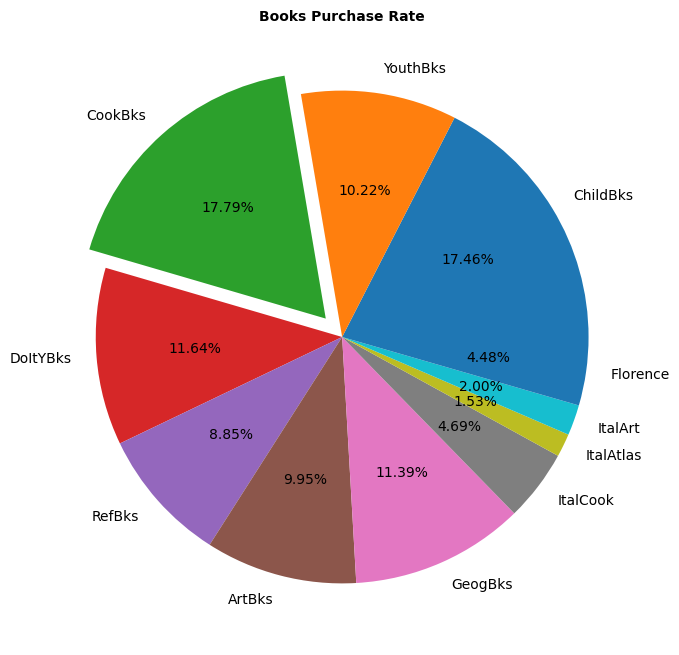

In [15]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(18, 8))
plt.pie(data.sum(),
        labels=data.columns,
        explode=[0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        autopct='%.2f%%')
plt.title("Books Purchase Rate", fontsize = 10, fontweight = 'bold')
plt.show()

In [16]:
# Top 10 Popular items
count.sort_values(ascending = False, inplace=True) # Remove the 0 argument
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


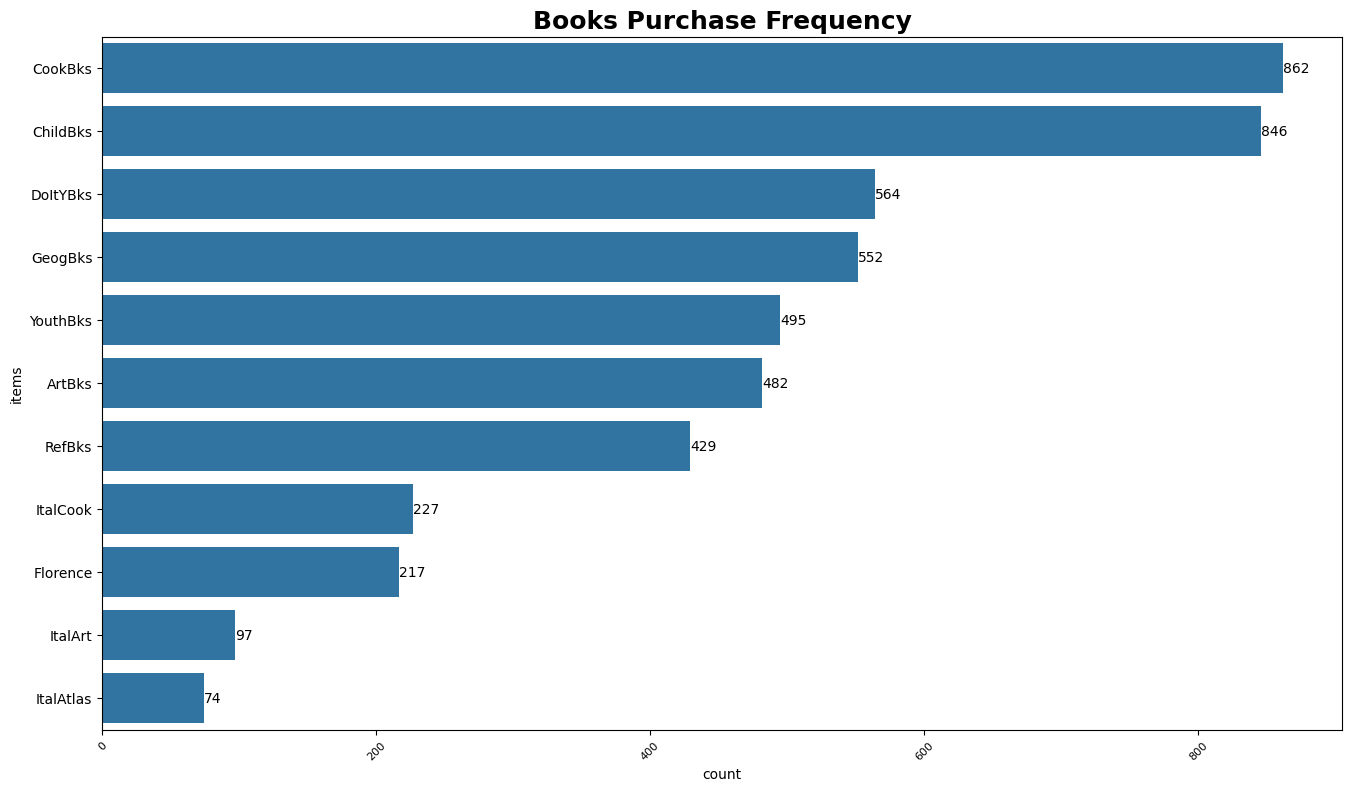

In [17]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 10)
plt.xticks(rotation = 45, fontsize = 8)
plt.title('Books Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

Observations:

Most Frequent Bought Books are : Cooking books and Child books Support and Length. If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value

In [18]:
# Product Frequency / Total Sales
first = pd.DataFrame(data.sum() / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


In [19]:
# Elimination by Support Value
first[first.Support >= 0.1]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085


In [20]:
# Elimination by Support Value
first[first.Support >= 0.15]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145


In [21]:
# Elimination by Support Value
first[first.Support >= 0.20]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145


In [22]:
#Second Iteration: Find support values for pair product combinations.
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['CookBks', 'ChildBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'ArtBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'ItalCook'],
 ['CookBks', 'Florence'],
 ['CookBks', 'ItalArt'],
 ['CookBks', 'ItalAtlas']]

In [23]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(CookBks, ChildBks)",0.2560,2
"(ChildBks, GeogBks)",0.1950,2
"(CookBks, GeogBks)",0.1925,2
"(CookBks, DoItYBks)",0.1875,2
"(ChildBks, DoItYBks)",0.1840,2
"(CookBks, ArtBks)",0.1670,2
"(ChildBks, YouthBks)",0.1650,2
"(ChildBks, ArtBks)",0.1625,2
"(CookBks, YouthBks)",0.1620,2


In [24]:
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['CookBks', 'ChildBks', 'DoItYBks'],
 ['CookBks', 'ChildBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'Florence'],
 ['CookBks', 'ChildBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'ItalAtlas'],
 ['CookBks', 'DoItYBks', 'GeogBks']]

In [25]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(CookBks, ChildBks, GeogBks)",0.1495,3
"(CookBks, ChildBks, DoItYBks)",0.1460,3
"(CookBks, ChildBks, YouthBks)",0.1290,3
"(CookBks, ChildBks, ArtBks)",0.1265,3
"(CookBks, ChildBks, RefBks)",0.1225,3
"(CookBks, DoItYBks, GeogBks)",0.1085,3
"(ChildBks, DoItYBks, GeogBks)",0.1045,3
"(CookBks, GeogBks, ArtBks)",0.1035,3
"(ChildBks, GeogBks, ArtBks)",0.1020,3


In [26]:
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['CookBks', 'ChildBks', 'DoItYBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'Florence'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalAtlas'],
 ['CookBks', 'ChildBks', 'GeogBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'GeogBks', 'ArtBks']]

In [27]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


In [29]:
#Association Rules Association rules with 10% Support and 30% confidence

In [28]:
# With 10% Support
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


Support value gives us these information:

Head 5

42 percent of 100 purchases are ChildBks 24 percent of 100 purchases are YouthBks 43 percent of 100 purchases are CookBks 28 percent of 100 purchases are DoltYBks 21 percent of 100 purchases are RefBks Tail 5

10 percent of 100 purchases are ChildBks, GeogBks, DoItYBks 10 percent of 100 purchases are ChildBks, GeogBks, ArtBks 10 percent of 100 purchases are ArtBks, CookBks, DoItYBks 10 percent of 100 purchases are GeogBks, CookBks, DoItYBks 10 percent of 100 purchases are GeogBks, ArtBks, CookBks

In [30]:
# with 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
84,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
85,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
86,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
87,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [31]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
71,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
72,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
77,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
76,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [32]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
84,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
85,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
86,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
87,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


Visualization of obtained rule

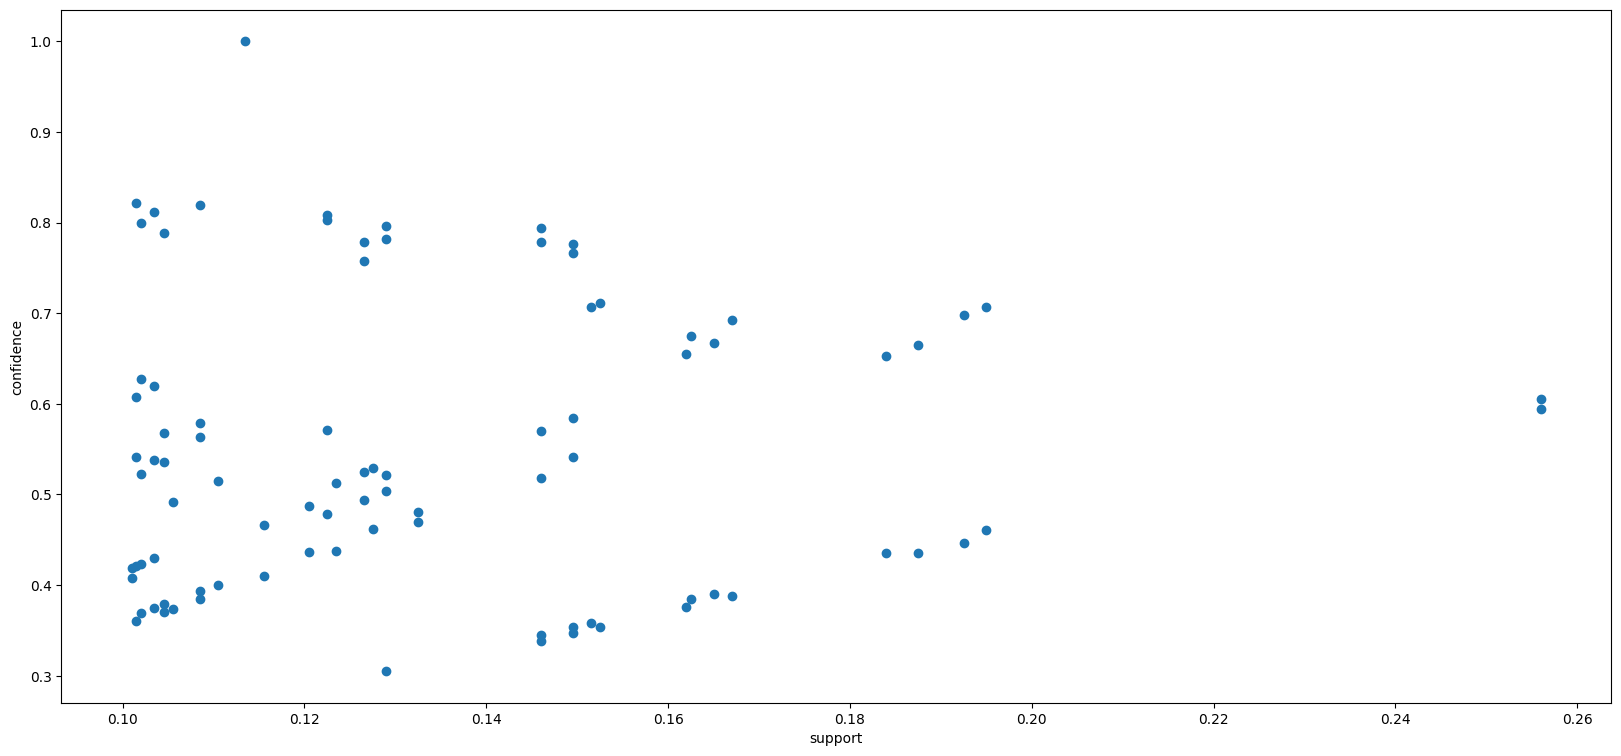

In [33]:
# visualization of obtained rule
plt.figure(figsize=(20,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [ ]:
matrix = lift.pivot(index='antecedents', columns='consequents', values='lift')
matrix

In [ ]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

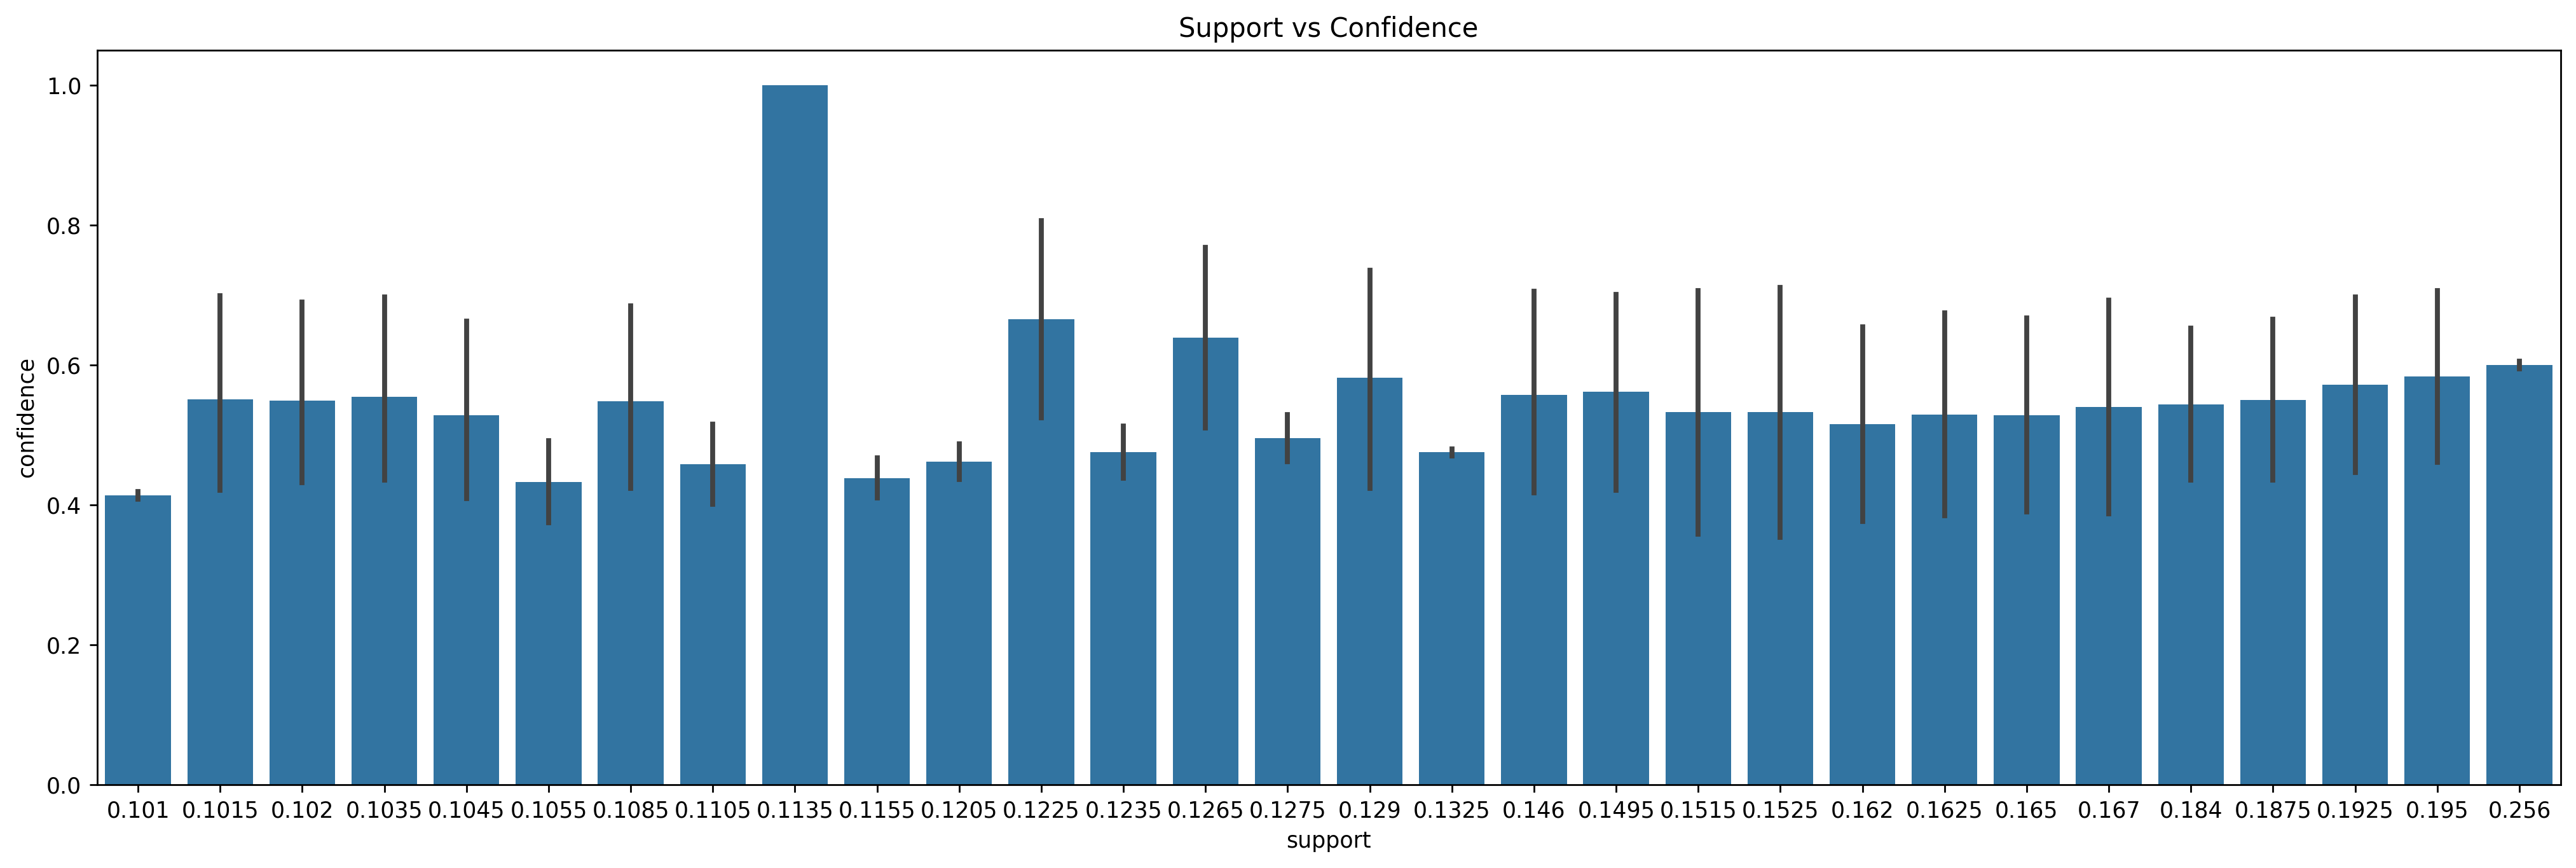

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6), dpi=250)
sns.barplot(x="support", y="confidence", data=lift)
plt.title("Support vs Confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

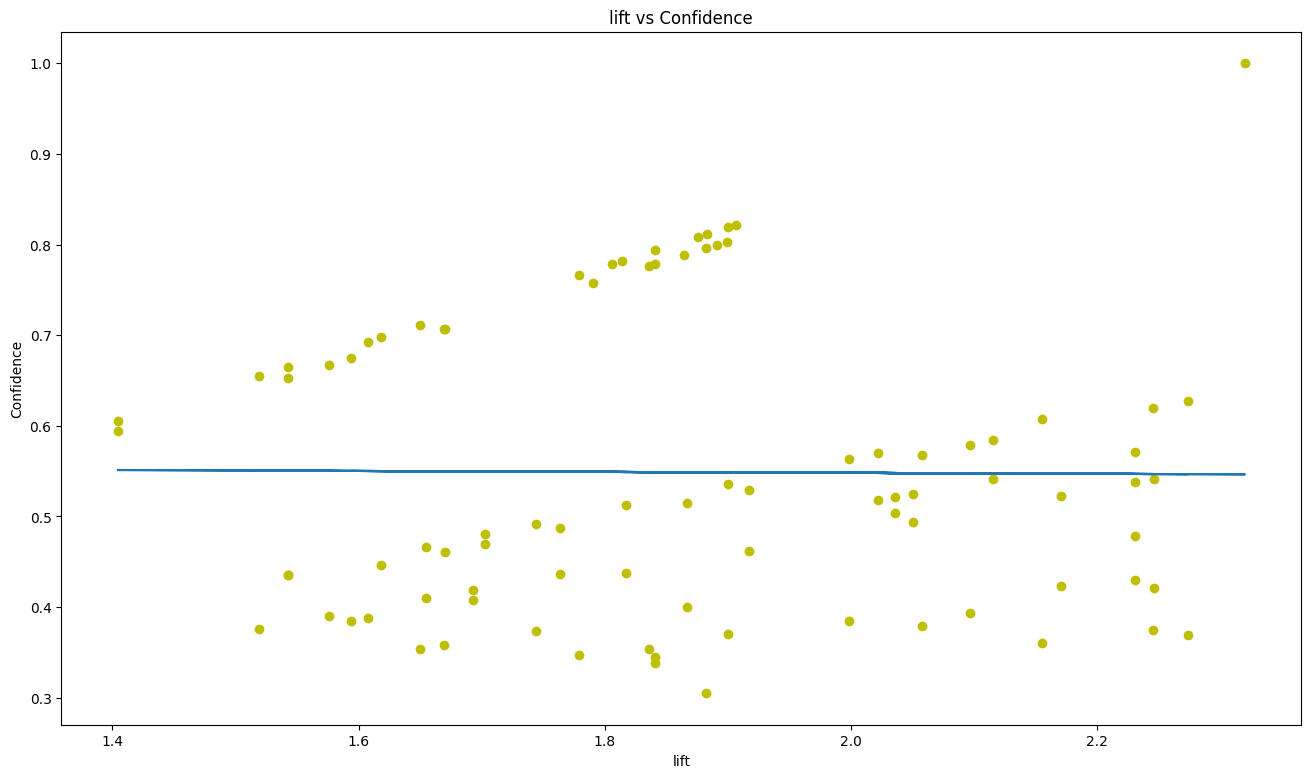

In [35]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 12)
plt.show()

Association rules with 15% Support and 40% confidence

In [36]:
# With 15% Support
frequent_itemsets=apriori(data,min_support=0.15,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(CookBks, ChildBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2


Support value gives us these information: Head 5

42 percent of 100 purchases are ChildBks 24 percent of 100 purchases are YouthBks 43 percent of 100 purchases are CookBks 28 percent of 100 purchases are DoltYBks 21 percent of 100 purchases are RefBks

In [38]:
# with 40% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(ChildBks),(DoItYBks),0.4230,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
7,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
8,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858


In [37]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
71,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
72,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
77,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
76,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [39]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(ChildBks),(DoItYBks),0.4230,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
7,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
8,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858


Visualization of obtained rule

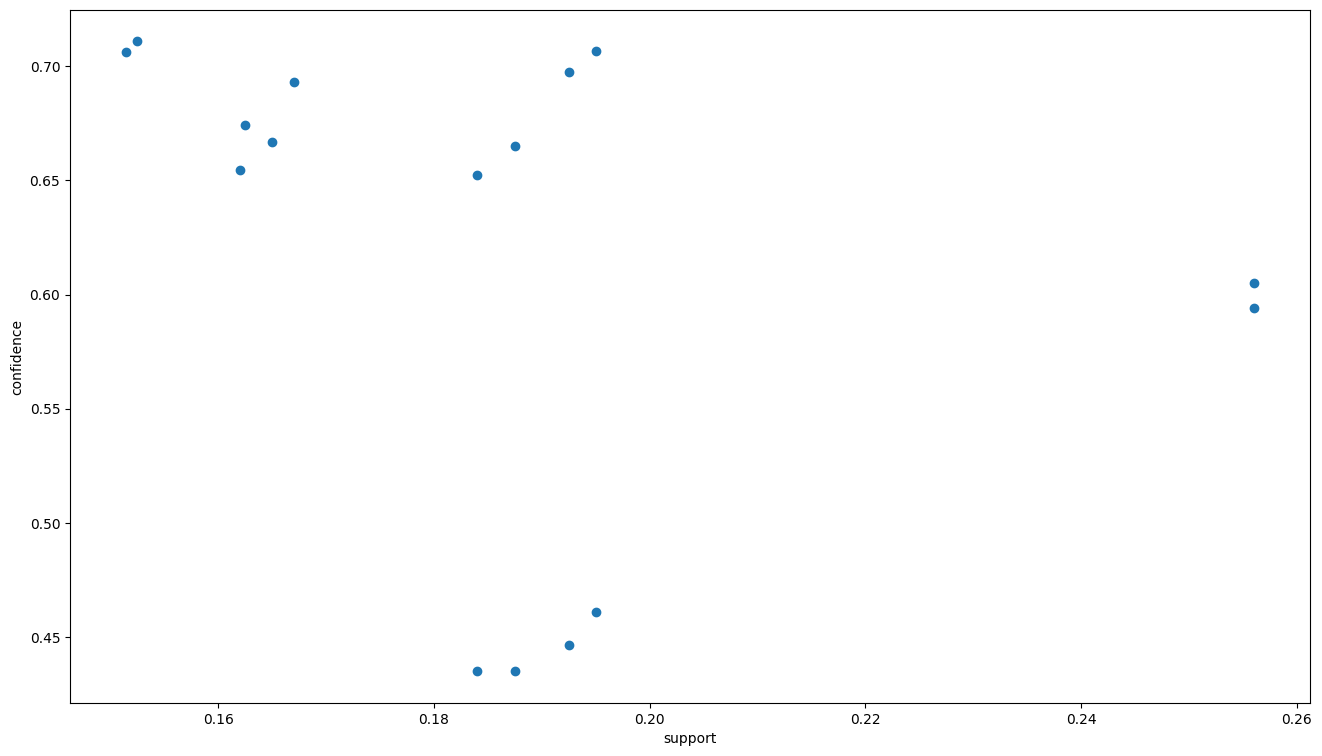

In [40]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [41]:
# Change the variable name to avoid overwriting the pivot function
matrix = lift.pivot(index='antecedents',columns='consequents',values='lift')
matrix

consequents,(ChildBks),(CookBks),(DoItYBks),(GeogBks)
antecedents,,,,
(YouthBks),1.576044,1.518667,NaN,NaN
(CookBks),1.404179,NaN,1.542677,1.618245
(ChildBks),NaN,1.404179,1.542511,1.670264
(DoItYBks),1.542511,1.542677,NaN,NaN
(RefBks),1.669725,1.649549,NaN,NaN
(ArtBks),1.594028,1.607763,NaN,NaN
(GeogBks),1.670264,1.618245,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'CookBks'})"),
  Text(2.5, 0, "frozenset({'DoItYBks'})"),
  Text(3.5, 0, "frozenset({'GeogBks'})")])

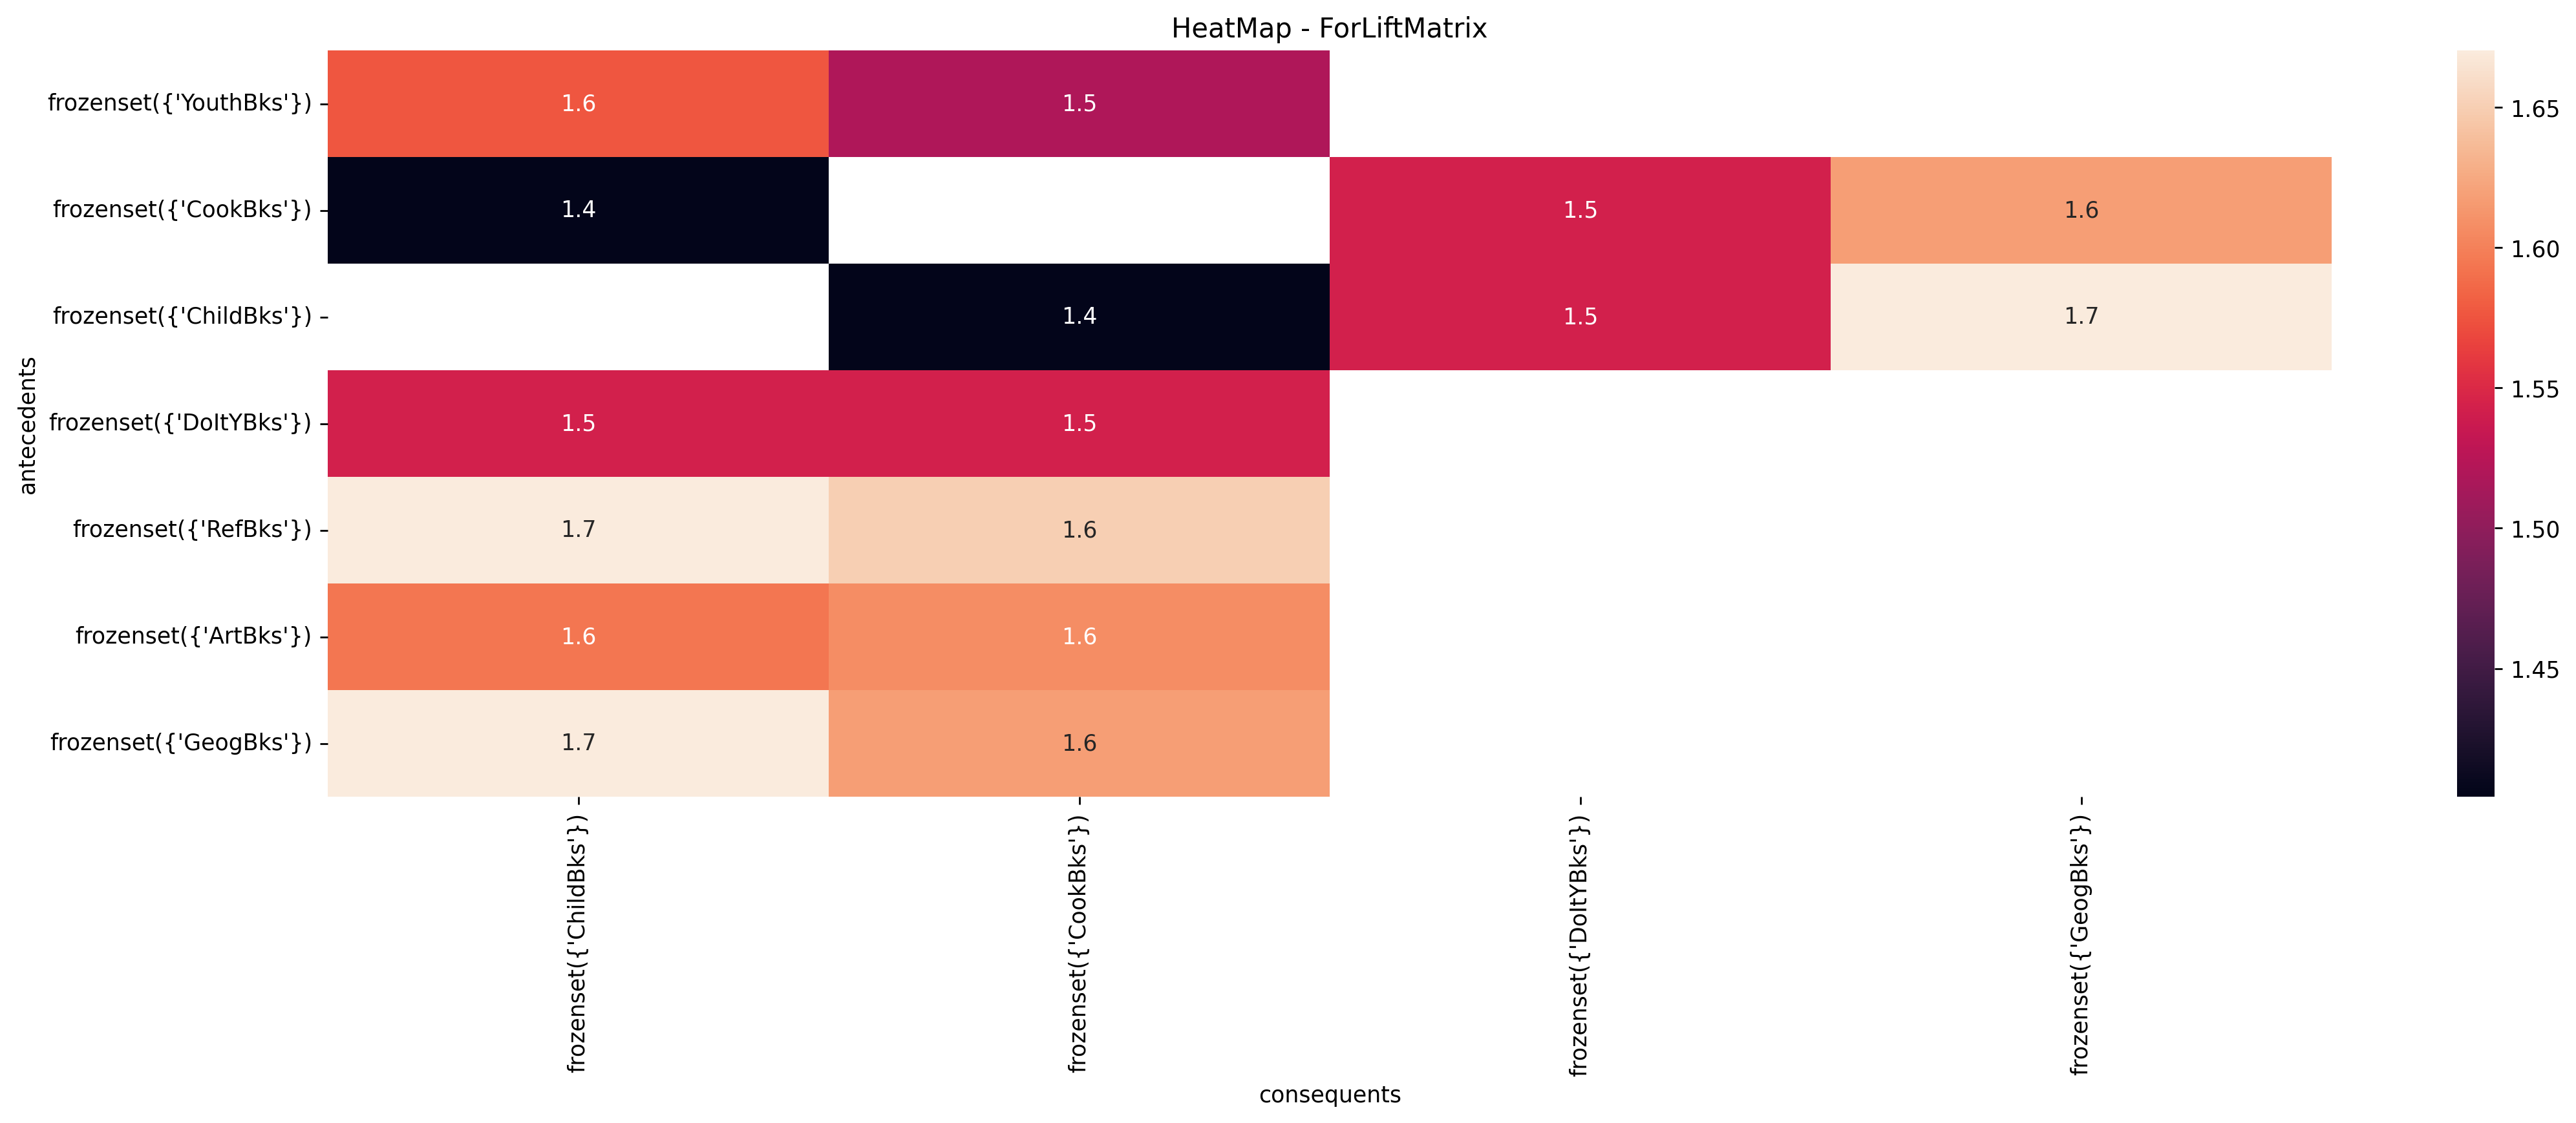

In [42]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6), dpi=250)
sns.barplot(x="support", y="confidence", data=lift)
plt.title("Support vs Confidence")
plt.show()

In [ ]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

Association rules with 20% Support and 60% confidence

In [43]:
# With 20% Support
frequent_itemsets=apriori(data,min_support=0.2,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


Support value gives us these information:

Head 5

42 percent of 100 purchases are ChildBks 24 percent of 100 purchases are YouthBks 43 percent of 100 purchases are CookBks 28 percent of 100 purchases are DoltYBks 21 percent of 100 purchases are RefBks

In [44]:
# with 60% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


In [46]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


Visualization of obtained rule

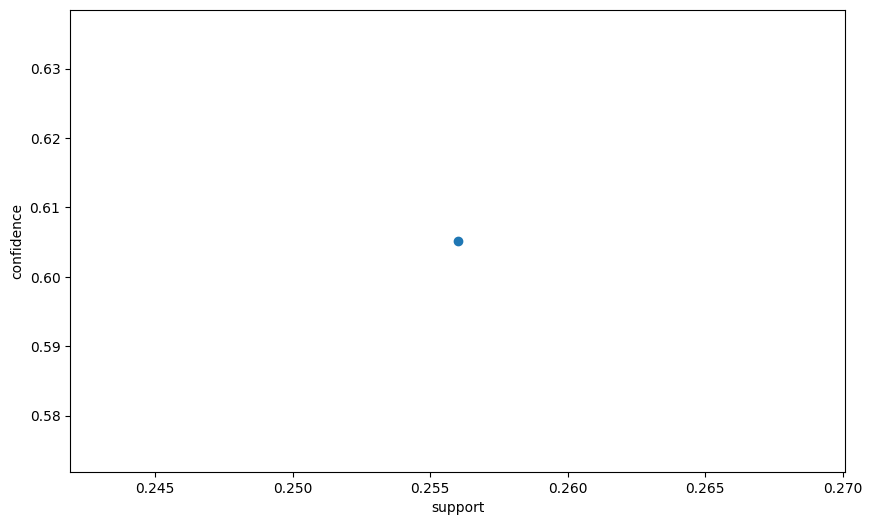

In [45]:
# visualization of obtained rule
plt.figure(figsize=(10,6))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [47]:
matrix = lift.pivot_table(index='antecedents', columns='consequents', values='lift')
matrix

consequents,(CookBks)
antecedents,
(ChildBks),1.404179


(array([0.5]), [Text(0.5, 0, "frozenset({'CookBks'})")])

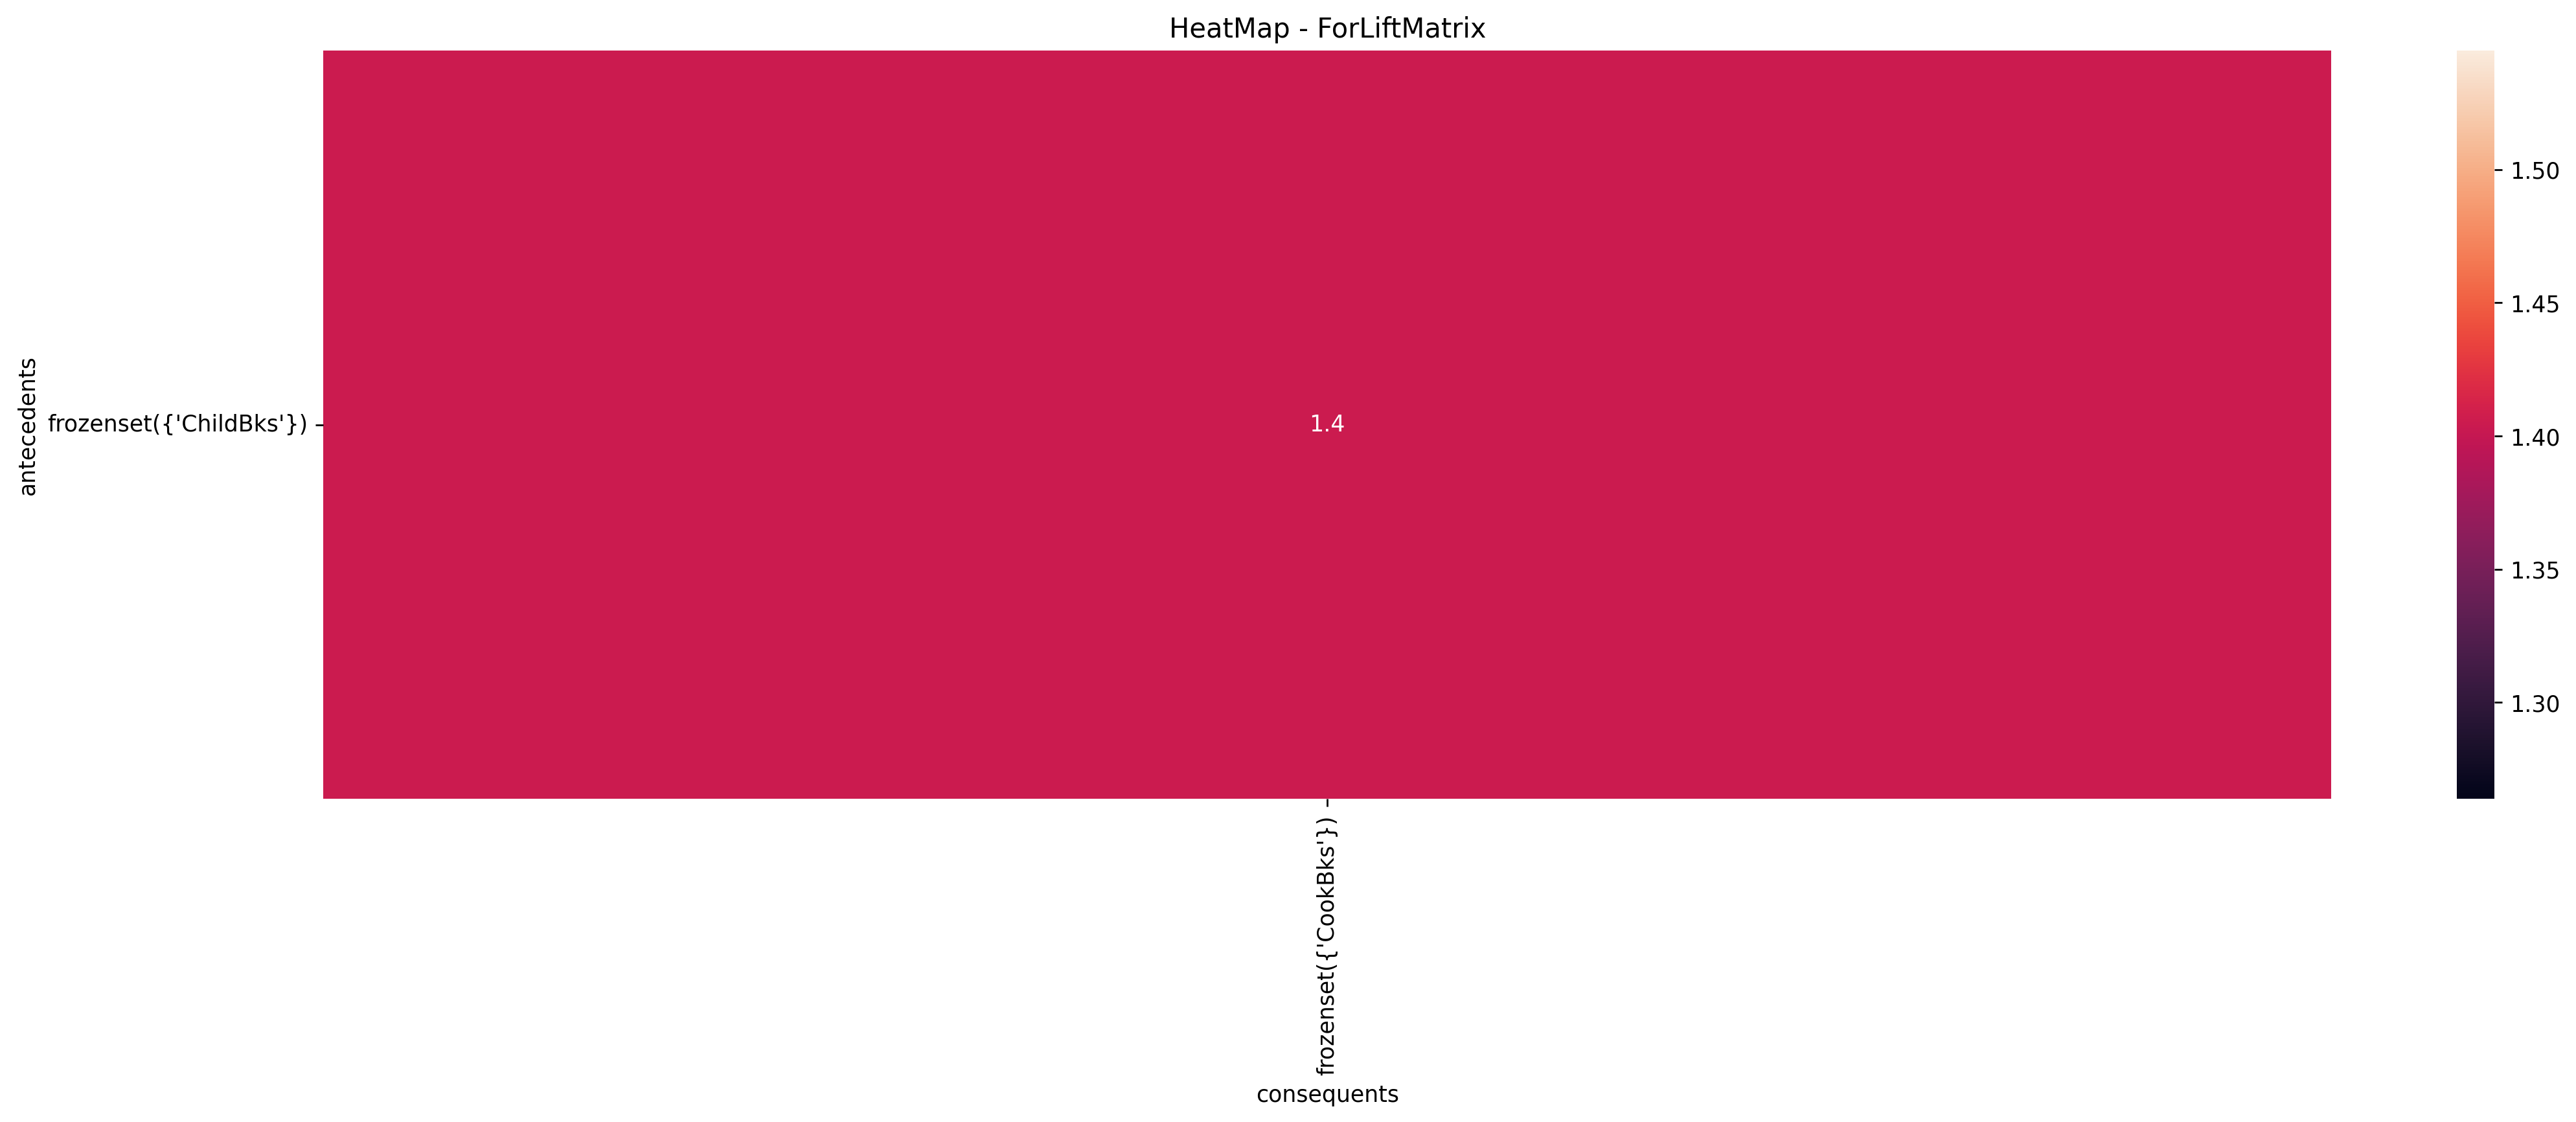

In [48]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

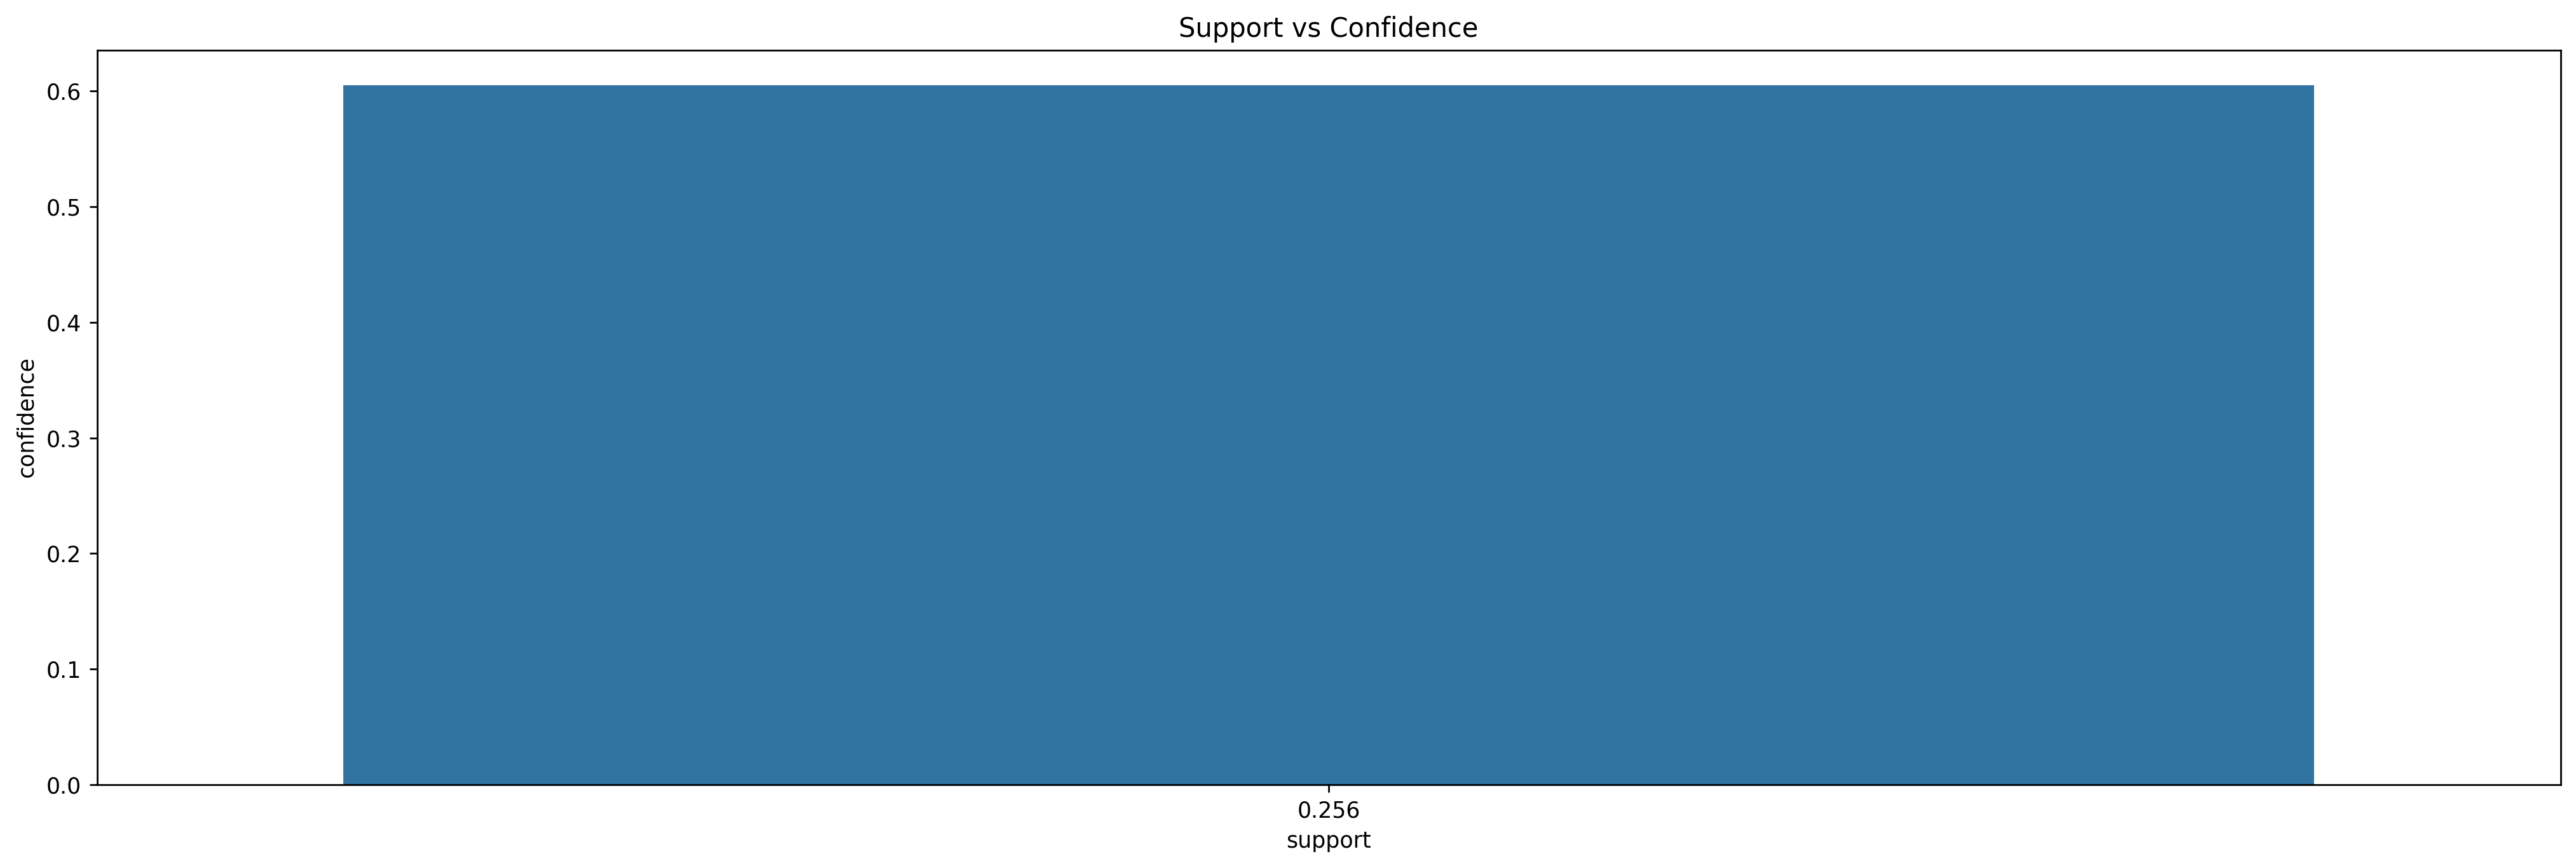

In [49]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot(x="support", y="confidence", data=lift)
plt.title("Support vs Confidence")
plt.show()


Association rules (Movie.csv)

Prepare rules for the all the data sets 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visualize the obtained rules using different plots

In [50]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [ ]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)

In [52]:
from google.colab import files
uploaded=files.upload()

Saving my_movies.csv to my_movies.csv


In [53]:
df=pd.read_csv("my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [54]:
data = df.iloc[:,5:]
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [55]:
#Discriptive statistics
# most popular items
count = data.loc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [56]:

for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

Sixth Sense
Sixth Sense
1    6
0    4
Name: count, dtype: int64

Gladiator
Gladiator
1    7
0    3
Name: count, dtype: int64

LOTR1
LOTR1
0    8
1    2
Name: count, dtype: int64

Harry Potter1
Harry Potter1
0    8
1    2
Name: count, dtype: int64

Patriot
Patriot
1    6
0    4
Name: count, dtype: int64

LOTR2
LOTR2
0    8
1    2
Name: count, dtype: int64

Harry Potter2
Harry Potter2
0    9
1    1
Name: count, dtype: int64

LOTR
LOTR
0    9
1    1
Name: count, dtype: int64

Braveheart
Braveheart
0    9
1    1
Name: count, dtype: int64

Green Mile
Green Mile
0    8
1    2
Name: count, dtype: int64



In [57]:
print('The unique books sold are {}'.format(data.columns))
print("The number of unique books sold are {} ".format(data.columns.size))

The unique books sold are Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')
The number of unique books sold are 10 


Data Visulization

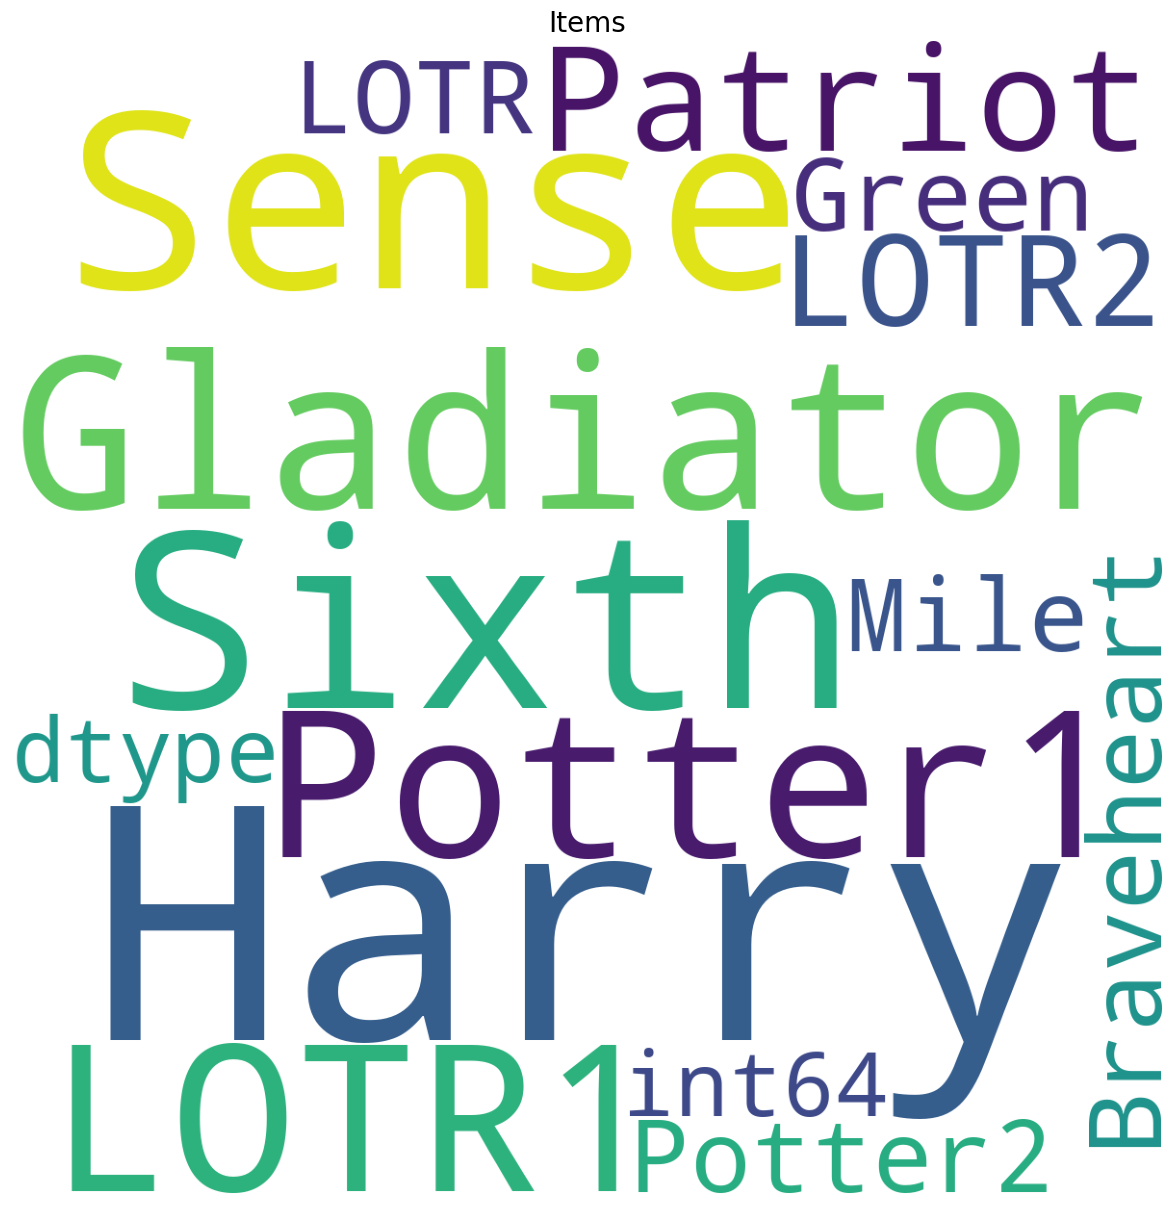

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

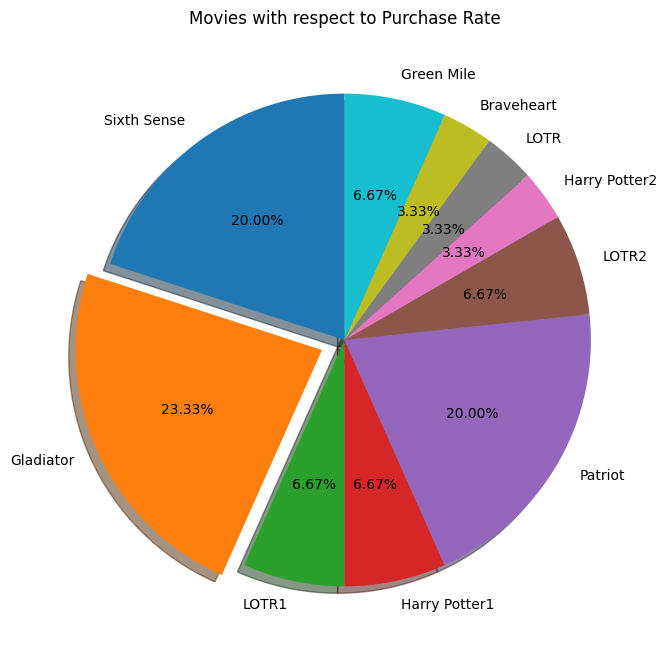

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Your existing code for plt.pie() without the rotation parameter
plt.pie(data.sum(),
        labels=data.columns,
        explode=[0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        autopct='%.2f%%',
        shadow=True,
        startangle=90  # You can set startangle to a different value if needed
        )

plt.title('Movies with respect to Purchase Rate')
plt.show()

In [60]:
#Top 10 Popular items
count.sort_values(ascending = False, inplace=True) #Remove the 0 argument
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


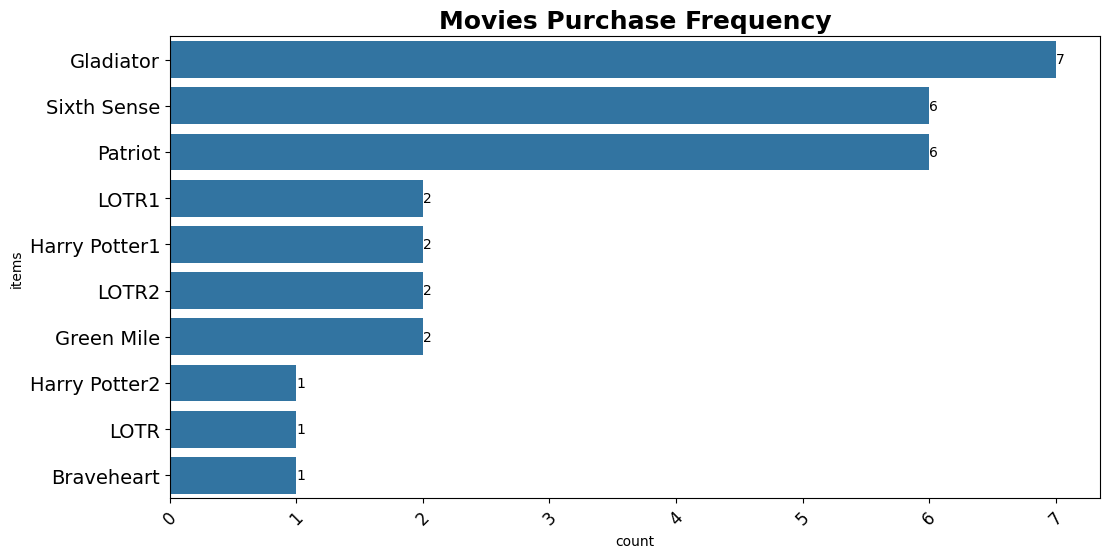

In [61]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Movies Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)


Observations:

Most Frequent Bought Books are : Gladiator and Sixth Sense

Support and Length If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.

In [62]:
# Product Frequency / Total Sales
first = pd.DataFrame(data.sum() / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [63]:
# Elimination by Support Value
first[first.Support >= 0.1]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [64]:
# Elimination by Support Value
first[first.Support >= 0.15]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [65]:
# Elimination by Support Value
first[first.Support >= 0.20]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [66]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'LOTR1'],
 ['Gladiator', 'Harry Potter1'],
 ['Gladiator', 'LOTR2'],
 ['Gladiator', 'Green Mile'],
 ['Gladiator', 'Harry Potter2'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Braveheart'],
 ['Sixth Sense', 'Patriot']]

In [67]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


In [ ]:
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

In [68]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


In [69]:
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Braveheart'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Green Mile']]

In [70]:
#Association Rules
# With 10% Support
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


Support value gives us these information: Head 5

60 percent of 100 purchases are Sixth Sense

70 percent of 100 purchases are Gladiator

20 percent of 100 purchases are LOTR1

20 percent of 100 purchases are Harry Potter

60 percent of 100 purchases are Patriot

Tail 5

10 percent of 100 purchases are Green Mile, LOTR1, Harry Potter1, Sixth Sense

10 percent of 100 purchases are Green Mile, LOTR2, LOTR1, Sixth Sense

10 percent of 100 purchases are Green Mile, LOTR2, Harry Potter1, Sixth Sense

10 percent of 100 purchases are Green Mile, LOTR2, LOTR1, Harry Potter1

10 percent of 100 purchases are Sixth Sense, LOTR2, Harry Potter1, Green Mile, LOTR1

In [71]:
# with 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
212,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [72]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
212,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


Visualization of obtained rule

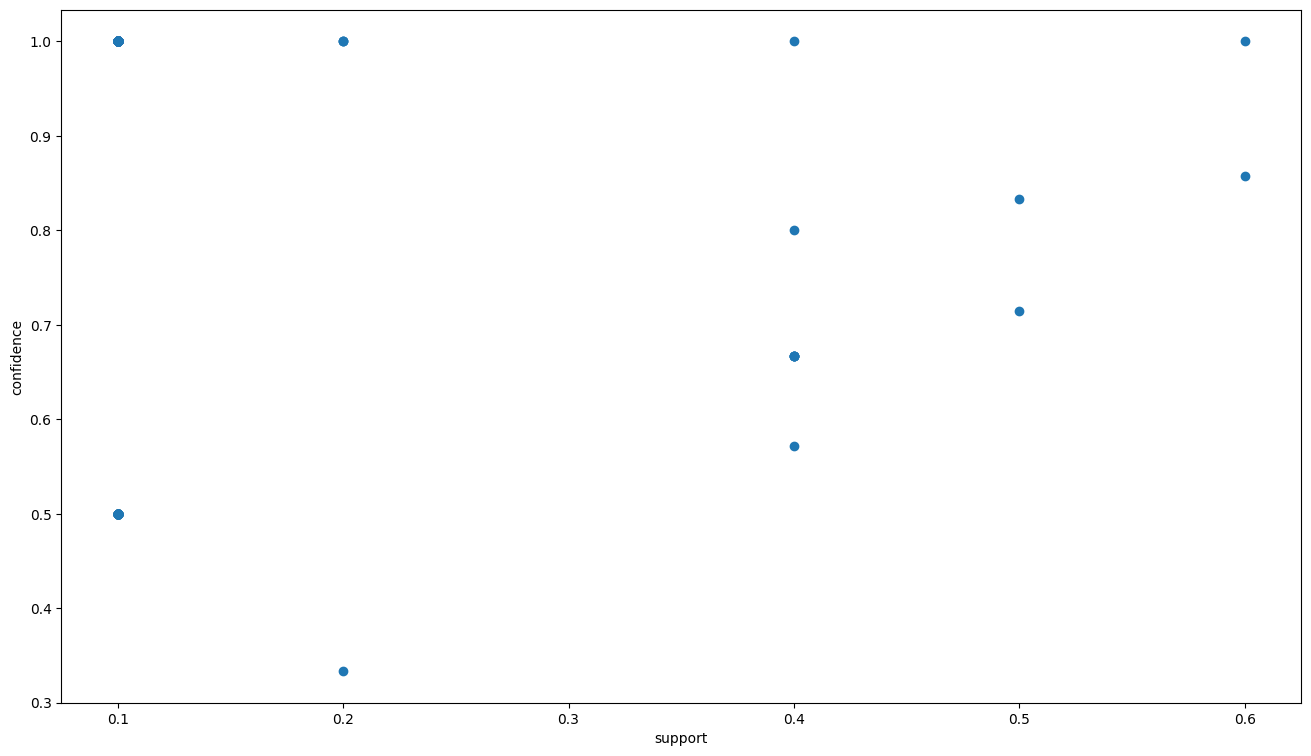

In [74]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [73]:
# The pivot function needs to be called with the column to pivot on as the first argument
matrix = lift.pivot(columns='antecedents', values='lift', index='consequents')
matrix

antecedents,(Sixth Sense),"(LOTR2, Green Mile)","(LOTR, Green Mile)","(Braveheart, Gladiator)","(Braveheart, Patriot)","(LOTR1, LOTR2)","(Sixth Sense, LOTR, Gladiator)",(Harry Potter1),"(Sixth Sense, LOTR, Green Mile)","(Sixth Sense, Gladiator, Green Mile)","(LOTR, Gladiator, Green Mile)","(Sixth Sense, LOTR1, Harry Potter1)","(Sixth Sense, LOTR1, LOTR2)","(Sixth Sense, Harry Potter1, LOTR2)","(LOTR1, Harry Potter1, LOTR2)",(Green Mile),"(Sixth Sense, LOTR1, Green Mile)","(Sixth Sense, LOTR2, Green Mile)","(LOTR1, LOTR2, Green Mile)","(Sixth Sense, LOTR1, Harry Potter1, LOTR2)","(Sixth Sense, LOTR1, LOTR2, Green Mile)","(Harry Potter1, LOTR2)","(Harry Potter1, Green Mile)","(Sixth Sense, Green Mile)","(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",(Gladiator),(Patriot),(LOTR),"(LOTR1, Harry Potter1, Green Mile)","(Sixth Sense, Harry Potter1, Green Mile)",(Braveheart),(LOTR1),"(LOTR1, Green Mile)",(Harry Potter2),(LOTR2),"(Sixth Sense, Patriot)","(Gladiator, Patriot)","(Sixth Sense, LOTR)","(LOTR, Gladiator)","(Gladiator, Green Mile)","(Sixth Sense, LOTR1)","(Sixth Sense, Harry Potter1)","(Harry Potter1, Green Mile, LOTR2)","(Sixth Sense, Harry Potter1, LOTR2, Green Mile)","(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)","(Sixth Sense, Gladiator)","(LOTR1, Harry Potter1, LOTR2, Green Mile)"
consequents,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,NaN,1.428571,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,1.428571,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,1.428571,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Harry Potter1, Green Mile)",NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN
"(LOTR1, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,NaN,NaN
"(LOTR2, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,10.000000,NaN,NaN,NaN
"(Sixth Sense, Gladiator, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, LOTR, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Harry Potter1, LOTR2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, LOTR1, Harry Potter1)",NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Harry Potter1, Green Mile)",NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5]),
 [Text(0.5, 0, "frozenset({'Sixth Sense'})"),
  Text(1.5, 0, "frozenset({'LOTR2', 'Green Mile'})"),
  Text(2.5, 0, "frozenset({'LOTR', 'Green Mile'})"),
  Text(3.5, 0, "frozenset({'Braveheart', 'Gladiator'})"),
  Text(4.5, 0, "frozenset({'Braveheart', 'Patriot'})"),
  Text(5.5, 0, "frozenset({'LOTR1', 'LOTR2'})"),
  Text(6.5, 0, "frozenset({'Sixth Sense', 'LOTR', 'Gladiator'})"),
  Text(7.5, 0, "frozenset({'Harry Potter1'})"),
  Text(8.5, 0, "frozenset({'Sixth Sense', 'LOTR', 'Green Mile'})"),
  Text(9.5, 0, "frozenset({'Sixth Sense', 'Gladiator', 'Green Mile'})"),
  Text(10.5, 0, "frozenset({'LOTR', 'Gladiator', 'Green Mile'})"),
  Text(11.5, 0, "frozenset({'Si

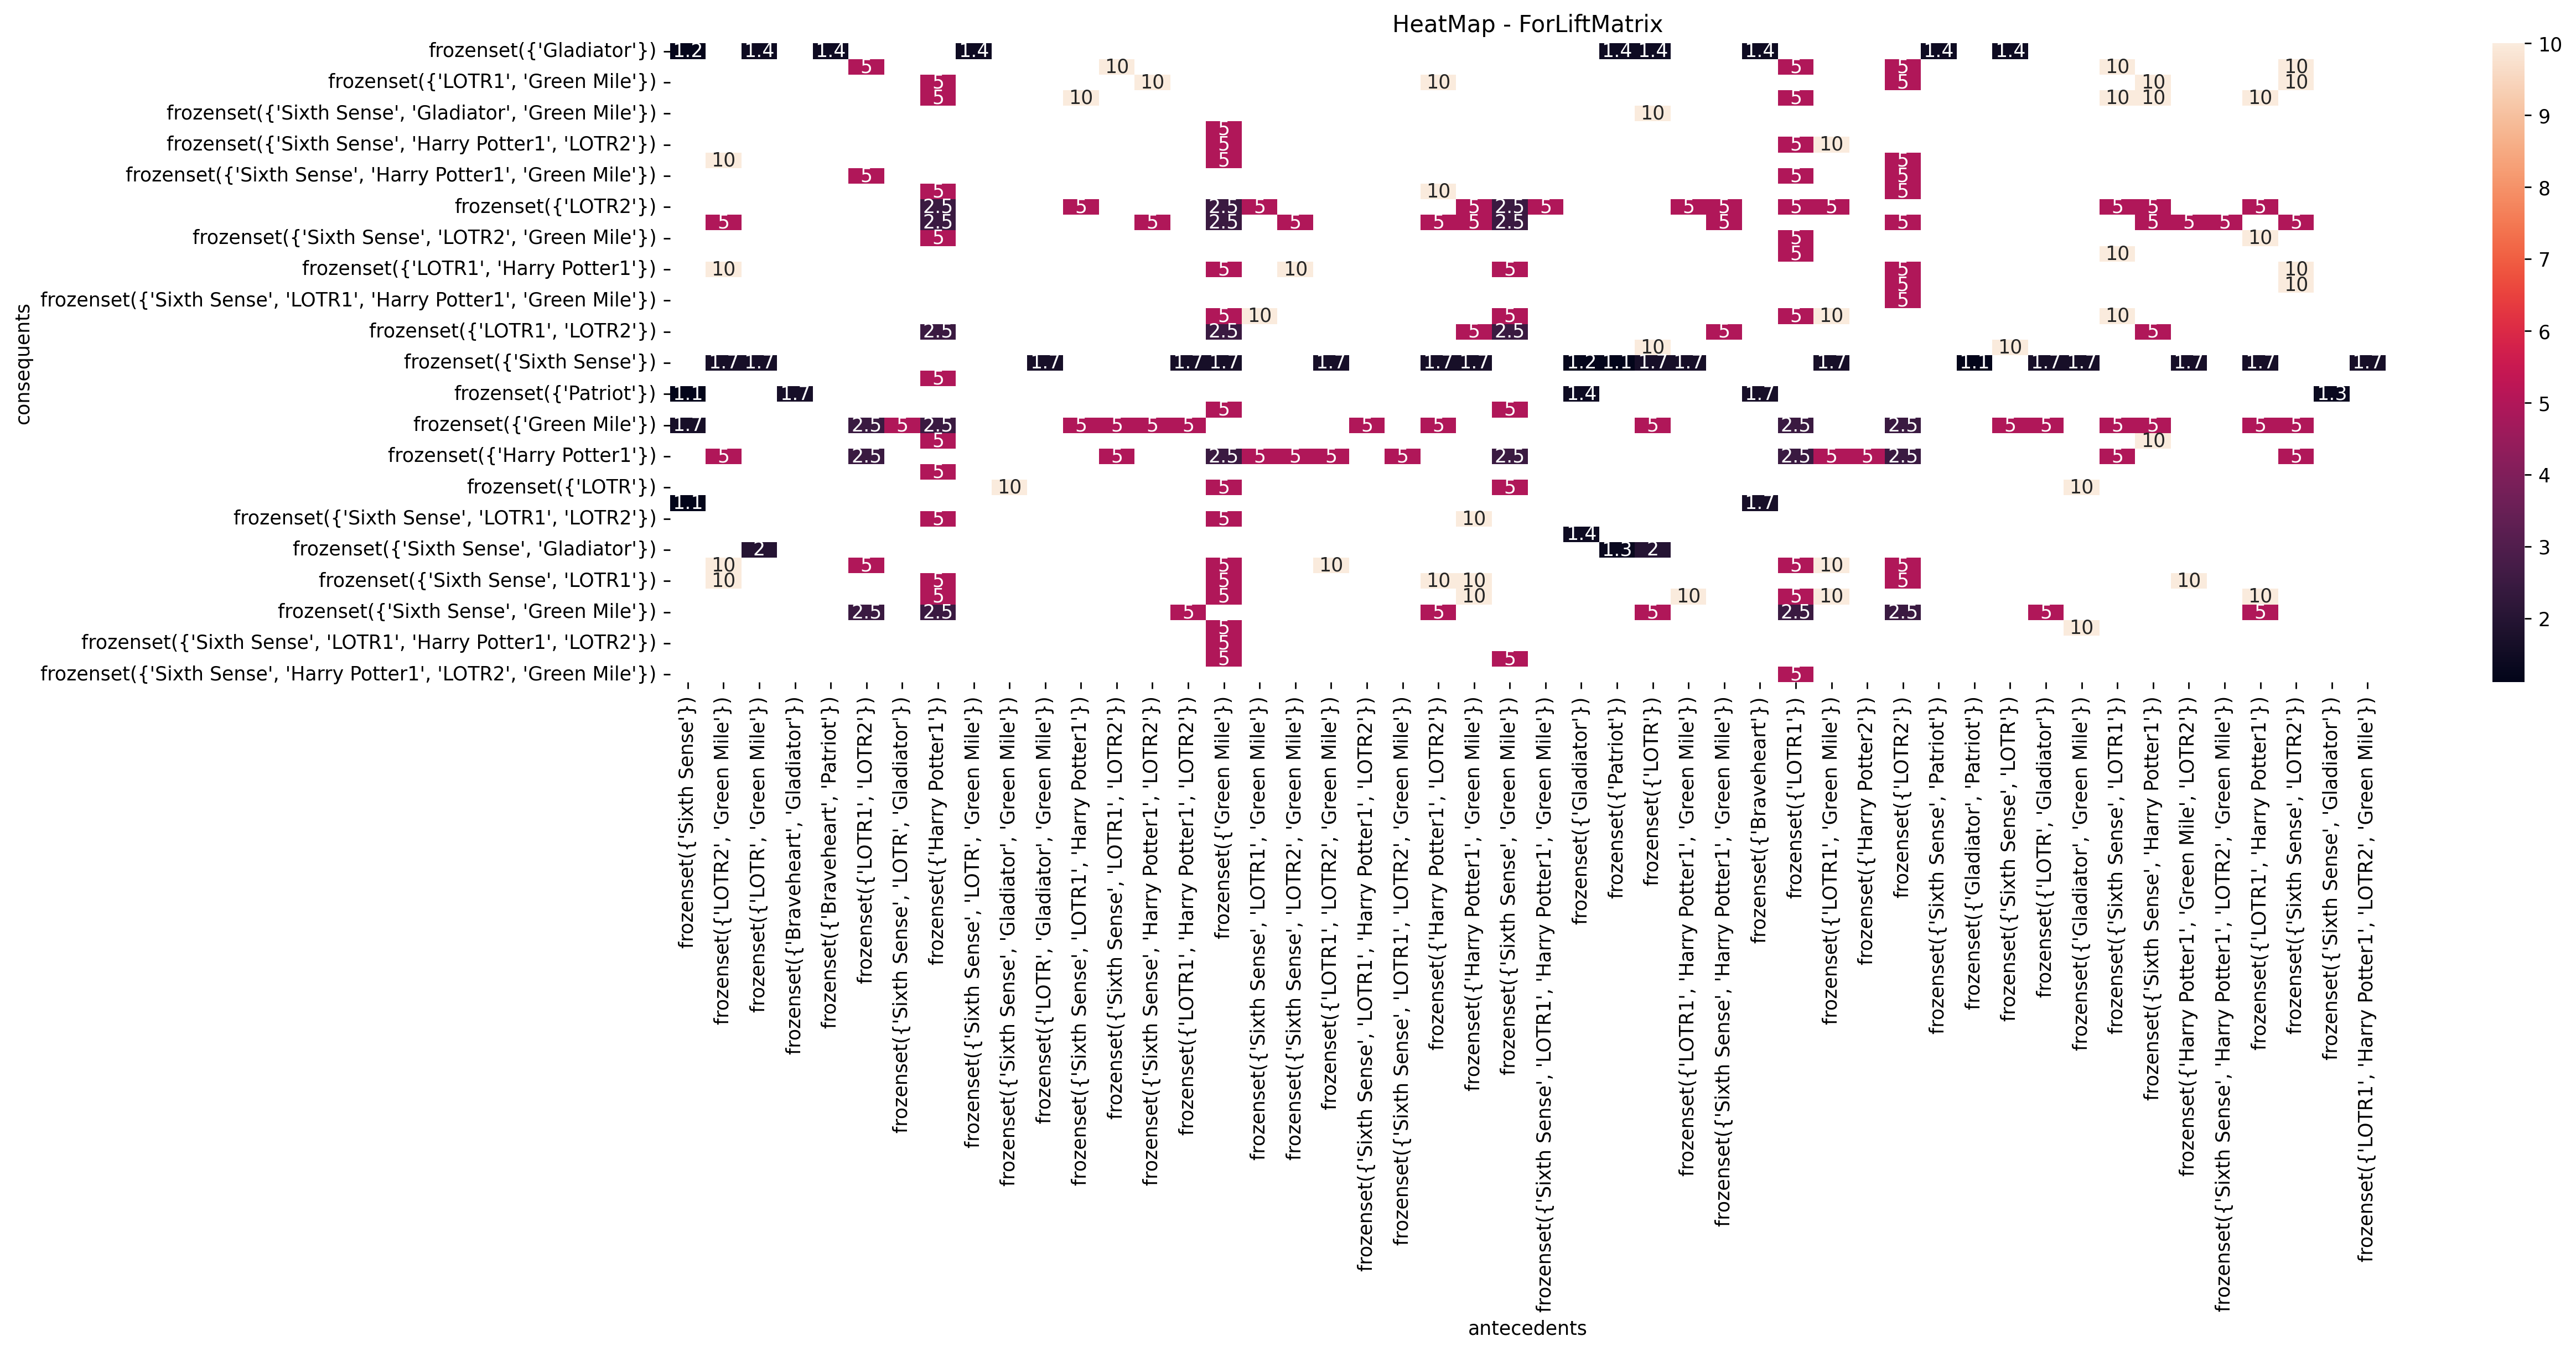

In [75]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

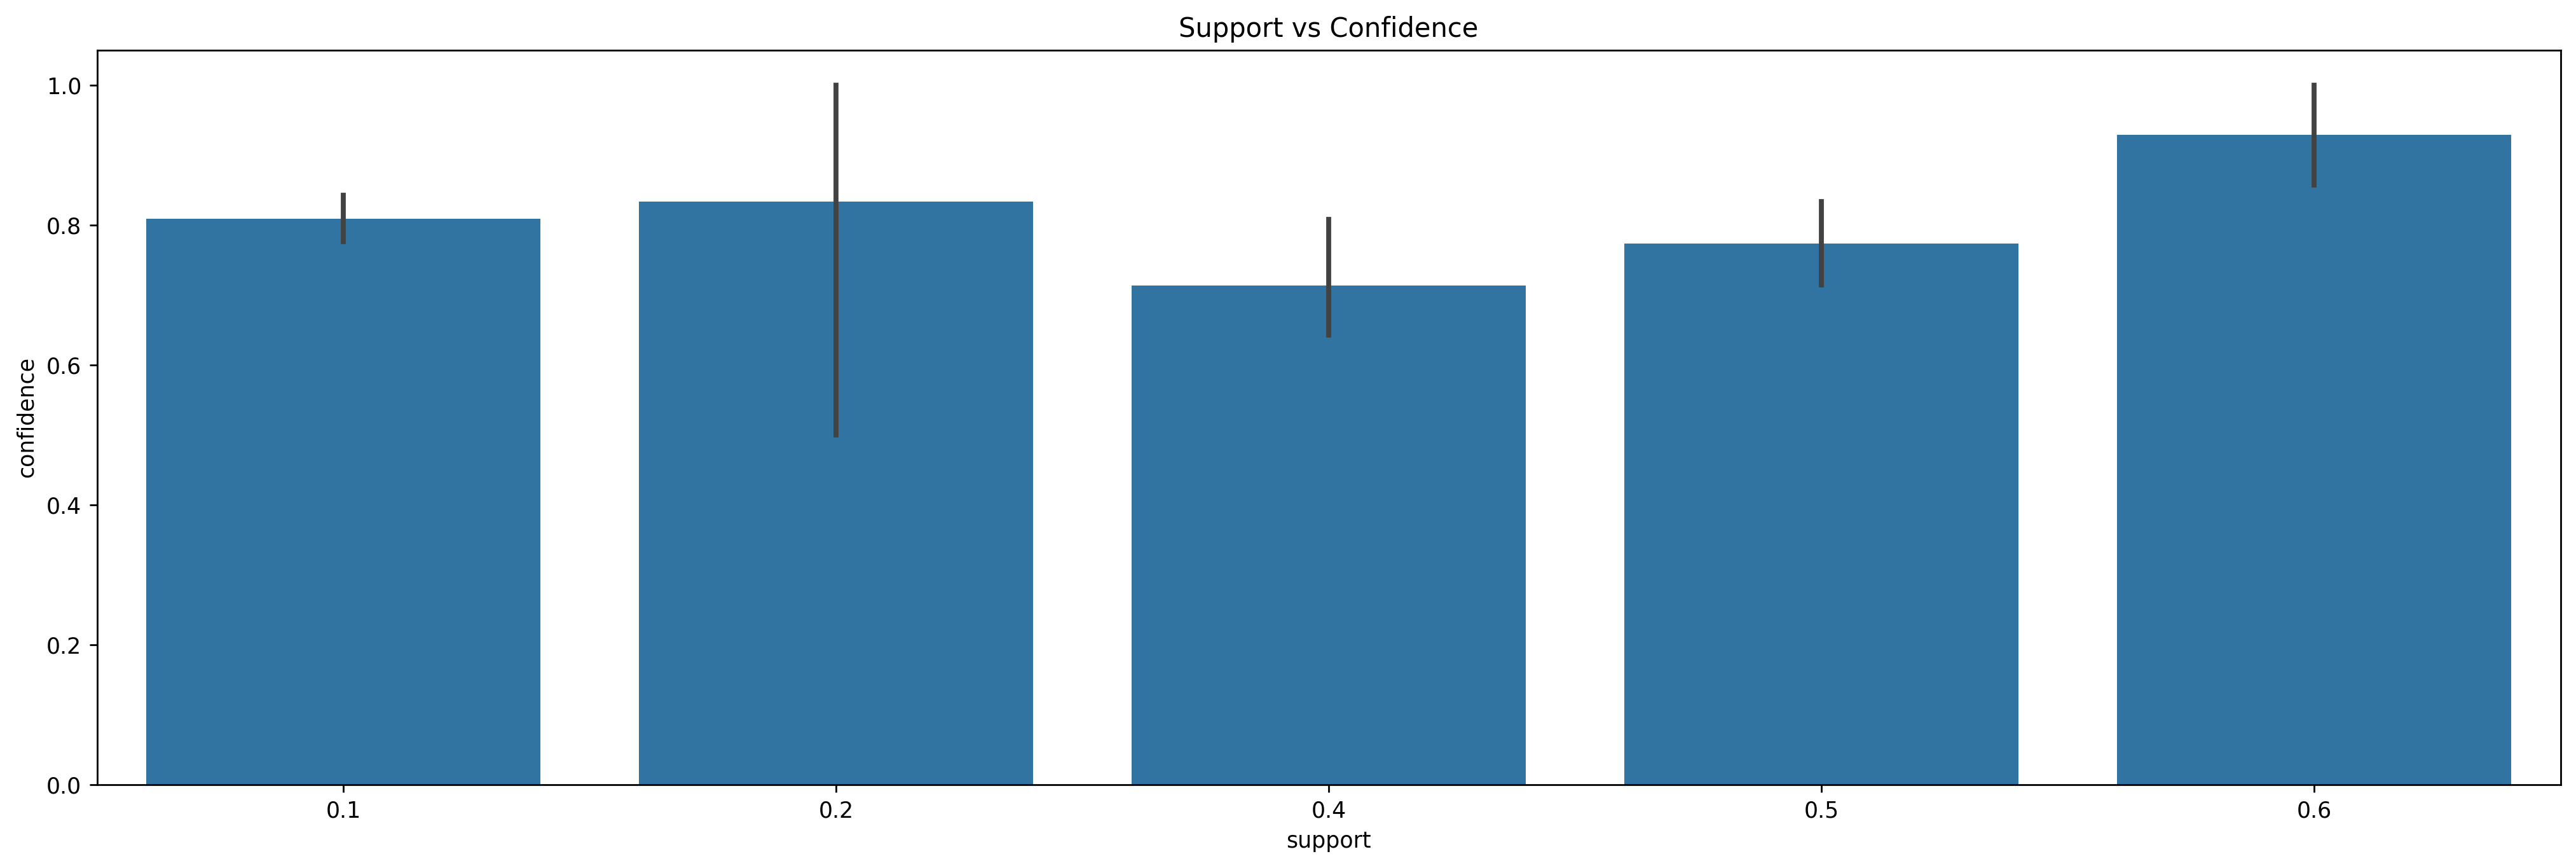

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6), dpi=250)

# Assuming "lift" is your DataFrame, and you want to create a bar plot with "support" on the x-axis and "confidence" on the y-axis
sns.barplot(x="support", y="confidence", data=lift)

plt.title("Support vs Confidence")
plt.show()


Text(0.5, 1.0, 'lift vs Confidence')

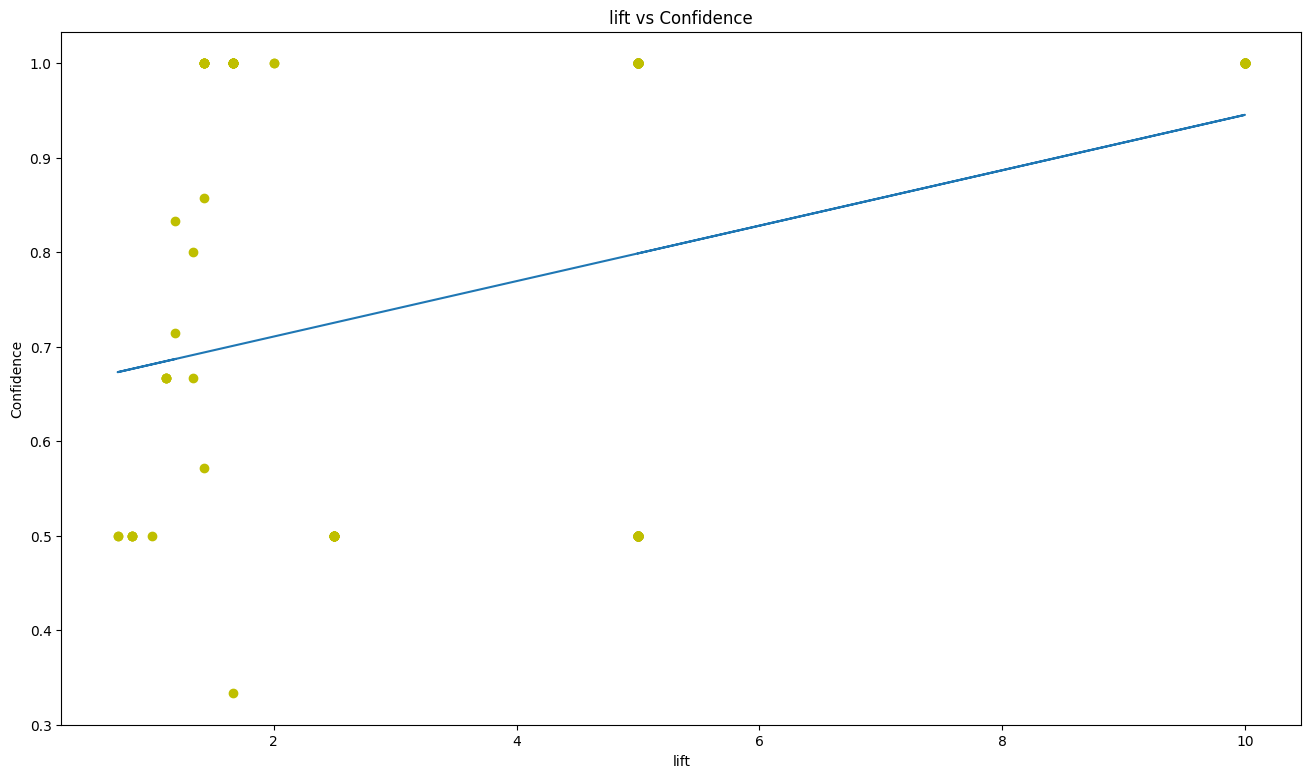

In [77]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

Association rules with 15% Support and 40% confidence

In [78]:
# With 15% Support
frequent_itemsets=apriori(data,min_support=0.15,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


Support value gives us these information:

Head 5

42 percent of 100 purchases are Sixth Sense 24 percent of 100 purchases are Gladiator 43 percent of 100 purchases are LOTR1 28 percent of 100 purchases are Harry Potter1 21 percent of 100 purchases are Patriot

In [79]:
# with 40% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


In [80]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
14,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000


In [81]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


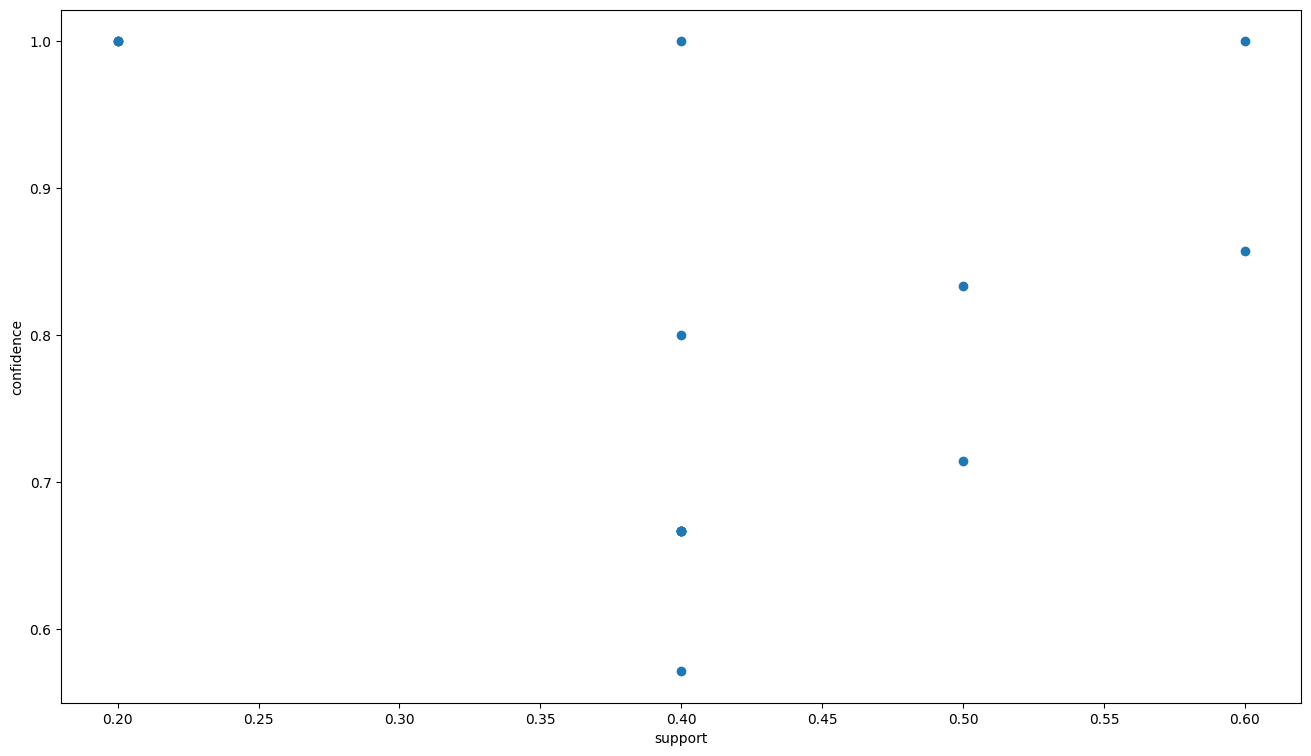

In [82]:
#Visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [83]:
# The pivot function needs to be called with the column to pivot on as the first argument
matrix = lift.pivot(columns='antecedents', values='lift', index='consequents')
matrix

antecedents,(Sixth Sense),(Gladiator),(Patriot),(Green Mile),(LOTR1),(LOTR2),"(Sixth Sense, Gladiator)","(Sixth Sense, Patriot)","(Gladiator, Patriot)"
consequents,,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,NaN,NaN,NaN,NaN,1.428571,NaN
(Sixth Sense),NaN,1.190476,1.111111,1.666667,NaN,NaN,NaN,NaN,1.111111
(Patriot),1.111111,1.428571,NaN,NaN,NaN,NaN,1.333333,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Gladiator, Patriot)",1.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Patriot)",NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, "frozenset({'Sixth Sense'})"),
  Text(1.5, 0, "frozenset({'Gladiator'})"),
  Text(2.5, 0, "frozenset({'Patriot'})"),
  Text(3.5, 0, "frozenset({'Green Mile'})"),
  Text(4.5, 0, "frozenset({'LOTR1'})"),
  Text(5.5, 0, "frozenset({'LOTR2'})"),
  Text(6.5, 0, "frozenset({'Sixth Sense', 'Gladiator'})"),
  Text(7.5, 0, "frozenset({'Sixth Sense', 'Patriot'})"),
  Text(8.5, 0, "frozenset({'Gladiator', 'Patriot'})")])

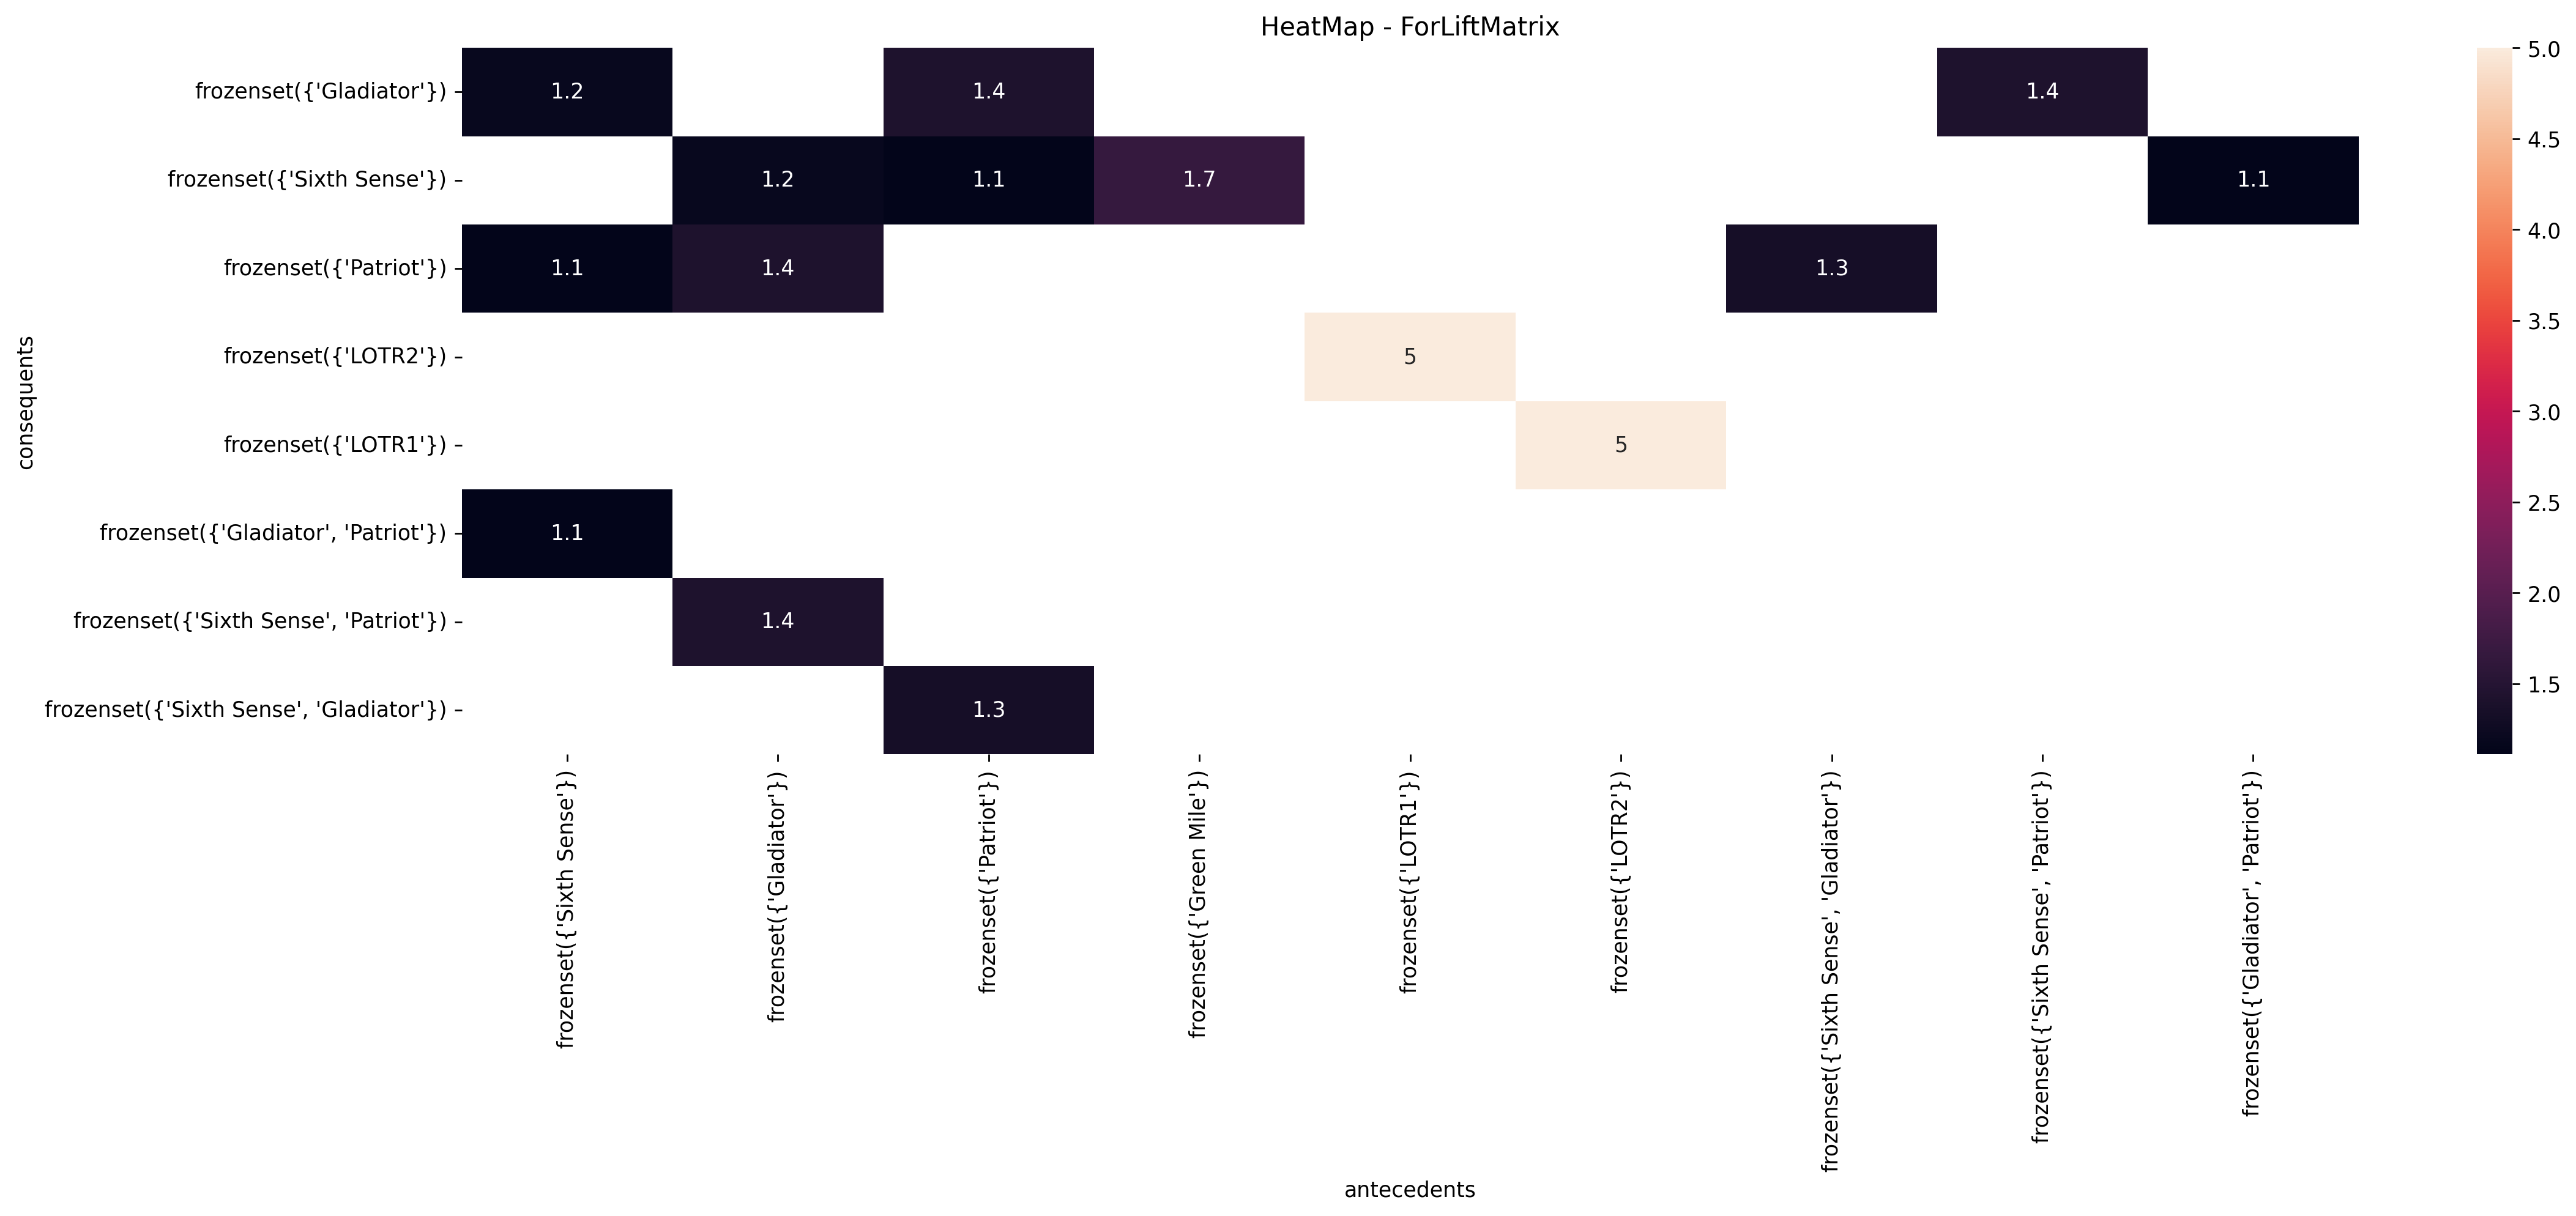

In [84]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

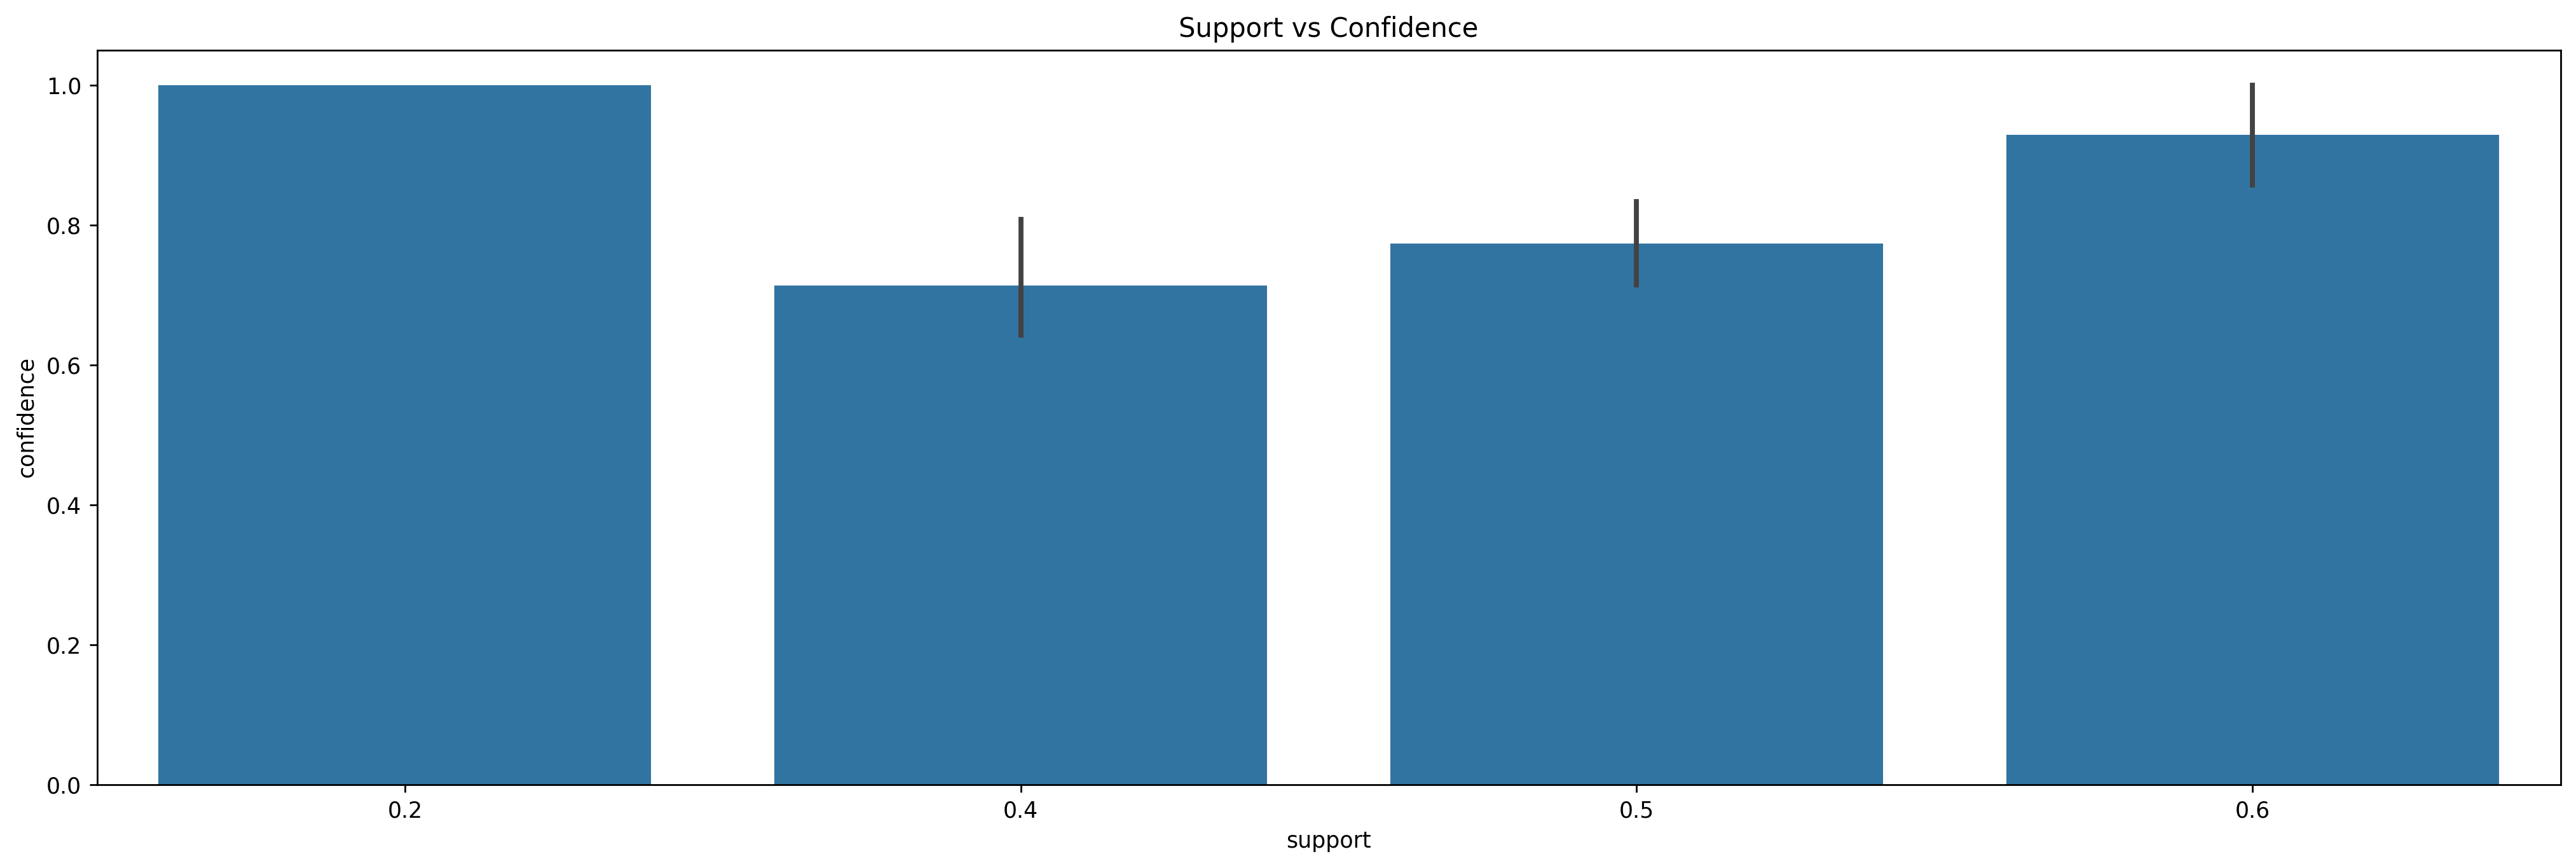

In [85]:
plt.figure(figsize=(20, 6), dpi=250)

# Specify x and y as separate parameters
sns.barplot(x="support", y="confidence", data=lift)

plt.title("Support vs Confidence")
plt.show()